<div class="alert alert-block alert-success">
    
# FIT5196 Task 1 in Assessment 2
#### Student Name: Yehezkiel Efraim Darmadi, Yogi Sarumaha
#### Student ID: 34078215, 34087672

Date: 18-10-2024


Environment: Python3

Libraries used:
- **re** (for regular expressions, installed and imported)
- **pandas** (for DataFrame operations, installed and imported)
- **os** (for interacting with the operating system, installed and imported)
- **seaborn** (for statistical data visualization, installed and imported)
- **matplotlib.pyplot** (for plotting and visualization, installed and imported)
- **numpy** (for numerical operations, installed and imported)
- **scipy.stats.boxcox** (for Box-Cox transformations, included in the `scipy` package, installed and imported)
- **sklearn.preprocessing.StandardScaler** (for feature scaling using standardization, included in `scikit-learn`, installed and imported)
- **sklearn.preprocessing.RobustScaler** (for feature scaling using robust scaling, included in `scikit-learn`, installed and imported)
- **sklearn.decomposition.PCA** (for Principal Component Analysis, included in `scikit-learn`, installed and imported)
- **sklearn.model_selection.train_test_split** (for splitting data into training and testing sets, included in `scikit-learn`, installed and imported)
- **sklearn.linear_model.LinearRegression** (for linear regression modeling, included in `scikit-learn`, installed and imported)
- **sklearn.metrics.r2_score, mean_squared_error** (for model evaluation metrics, included in `scikit-learn`, installed and imported)
- **statsmodels.stats.outliers_influence.variance_inflation_factor** (for calculating Variance Inflation Factor (VIF), included in `statsmodels`, installed and imported)
- **scipy** (for scientific and statistical functions, installed and imported)
- **skew** (to get the skewness of the features)

</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Import Data](#import_data) <br>
[4. Data Wrangling](#wrangling) <br>
[5. Linear Regression](#ln) <br>
[6. Data Exploration](#exploration) <br>
[7. Data Transformation and Data Scaling](#dt_and_ds) <br>
$\;\;\;\;$[7.1. Data Transformation](#transformation) <br>
$\;\;\;\;$[7.2. Data Scaling](#scaling) <br>
[8. Create Linear Regression Model](#create_model) <br>
$\;\;\;\;$[8.1. Feature Engineering](#engineering) <br>
$\;\;\;\;$[8.2. Feature Selection](#selection) <br>
$\;\;\;\;$[8.3. Check Assumption](#check_assump) <br>
$\;\;\;\;$[8.4. Final Model](#final_model) <br>
[9. Conclusion](#conclusion) <br>
[10. References](#Ref) <br>

-------------------------------------

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

The purpose of Task 2 is to prepare a dataset for linear regression modeling by exploring various normalization and transformation techniques. This task involves analyzing how different scaling methods—such as standardization, min-max normalization, and transformations like logarithmic or Box-Cox—affect the relationship between key attributes (number_of_houses, number_of_units, population, aus_born_perc, median_income) and the target variable (median_house_price).

The ultimate goal is to determine whether the data requires transformation or normalization to meet the assumptions of linear regression models. By ensuring that all features are on the same scale and exhibit a linear relationship with the target variable, the dataset will be better suited for modeling and provide more reliable results in subsequent analysis.

-------------------------------------

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

In [ ]:
pip install openpyxl

In [ ]:
# import libraries
import re
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import skew

In [ ]:
# connect to the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ass_2_file_dir =  "/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2"

-------------------------------------

<div class="alert alert-block alert-warning">

## 3.  Import Data <a class="anchor" name="import_data"></a>

 </div>

In [ ]:
!ls "/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2"

student_data  suburb_info.xlsx	warehouses.csv	warehouses.gsheet


In [ ]:
# import the dataset
df_xlsx = pd.read_excel(ass_2_file_dir + "/suburb_info.xlsx")
print(df_xlsx.shape)
df_xlsx.head()

(202, 8)


,suburb,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,ABBOTSFORD,2304,4706,Yarra,68%,"$1,797","$1,299,400",4025
1,ABERFELDIE,1410,453,Moonee Valley,81%,"$1,571","$1,926,600",22442
2,ALBANVALE,1897,138,Brimbank,46%,$907,"$594,200",54005
3,ALBION,1389,1392,Brimbank,52%,$929,"$739,100",30677
4,ALPHINGTON,1729,1099,Darebin,73%,"$1,538","$1,729,600",9227


-------------------------------------

<div class="alert alert-block alert-warning">

## 4. Data Wrangling <a class="anchor" name="wrangling"></a>

 </div>

We observe that the dataset contains unnecessary features. Therefore, we will select only the relevant features and the target variable for the model.

Additionally, we will rename "median_house_price" to "target" to prevent any confusion.

In [ ]:
# Select specific columns
df_xlsx_selected = df_xlsx[["number_of_houses", "number_of_units", "population", "aus_born_perc", "median_income", "median_house_price"]]

# Rename the last column to 'target'
df_xlsx_selected.columns = ["number_of_houses", "number_of_units", "population", "aus_born_perc", "median_income", "target"]

# Display the first few rows of the dataframe
df_xlsx_selected.head()

,number_of_houses,number_of_units,population,aus_born_perc,median_income,target
0,2304,4706,4025,68%,"$1,797","$1,299,400"
1,1410,453,22442,81%,"$1,571","$1,926,600"
2,1897,138,54005,46%,$907,"$594,200"
3,1389,1392,30677,52%,$929,"$739,100"
4,1729,1099,9227,73%,"$1,538","$1,729,600"


It can be seen that the data needs to be cleaned, there are still symbols that we need to remove such as "%" and "$".


In [ ]:
# Remove percentage from aus_born_perc and convert to numeric
df_xlsx_selected['aus_born_perc'] = df_xlsx_selected['aus_born_perc'].str.replace('%', '').astype(float) / 100

# Remove dollar signs and commas from median_income and target, then convert to numeric
df_xlsx_selected['median_income'] = df_xlsx_selected['median_income'].str.replace('[$,]', '', regex=True).astype(float)
df_xlsx_selected['target'] = df_xlsx_selected['target'].str.replace('[$,]', '', regex=True).astype(float)

df_xlsx_selected.head()

<ipython-input-8-26b1882f395f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xlsx_selected['aus_born_perc'] = df_xlsx_selected['aus_born_perc'].str.replace('%', '').astype(float) / 100
<ipython-input-8-26b1882f395f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xlsx_selected['median_income'] = df_xlsx_selected['median_income'].str.replace('[$,]', '', regex=True).astype(float)
<ipython-input-8-26b1882f395f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,number_of_houses,number_of_units,population,aus_born_perc,median_income,target
0,2304,4706,4025,0.68,1797.0,1299400.0
1,1410,453,22442,0.81,1571.0,1926600.0
2,1897,138,54005,0.46,907.0,594200.0
3,1389,1392,30677,0.52,929.0,739100.0
4,1729,1099,9227,0.73,1538.0,1729600.0


Let's check for null values in the data

In [ ]:
# check missing values
missing_values = df_xlsx_selected.isnull().sum()

print(missing_values)

number_of_houses    0
number_of_units     0
population          0
aus_born_perc       0
median_income       0
target              0
dtype: int64


-------------------------------------

<div class="alert alert-block alert-warning">

## 5. Linear Regression <a class="anchor" name="ln"></a>

 </div>

In [ ]:
# help(LinearRegression)

We will use the default LinearRegression from the sklearn.linear_model package. According to the documentation, this model utilizes the Ordinary Least Squares (OLS) method (Scikit-learn, n.d.). OLS is a technique for estimating the coefficients of a linear regression model (Montgomery, Peck, & Vining, 2021). Therefore, we will base our analysis on the assumptions of OLS.

OLS relies on several key assumptions, and violating these can result in inaccurate predictions or misleading conclusions. The primary assumptions of linear regression are:

1. **Linearity**:  
   The relationship between the independent and dependent variables should be linear. If it’s nonlinear, the model may underperform. Visual checks like scatter or residual plots can help, and transformations may be needed if this assumption is violated.

2. **Independence of Errors**:  
   The residuals (errors) should be independent of each other. This can be checked using a residual plot: if the errors are independent, the residuals will appear randomly scattered. Patterns or trends (like waves) suggest autocorrelation.

3. **Homoscedasticity**:  
   Residuals should have constant variance across all levels of the predictors. Heteroscedasticity, where variance changes with predictors, can lead to unreliable statistical tests. Residual plots can reveal this, and transformations or weighted regression can fix it.

4. **Normality of Residuals**:  
   Residuals should be normally distributed, especially for hypothesis testing. Q-Q plots or histograms can detect deviations. If this assumption is violated, transformations or robust methods may be needed.

5. **No Multicollinearity**:  
   Independent variables should not be highly correlated with each other. Multicollinearity inflates standard errors, making coefficient estimates unstable. It can be detected using correlation table (Montgomery, Peck, & Vining, 2021).

Below are the function to check all of the assumptions.

In [ ]:
def plot_single_residual(df, target_column, selected_feature="all", residual_vs_fitted=False):
    """
    Plots residuals of a linear regression model against either fitted values or a selected feature.

    Parameters:
    df : DataFrame
        The DataFrame containing the features and target variable.
    target_column : str
        The name of the target variable (column).
    selected_feature : str, default="all"
        The feature column name to plot residuals against if residual_vs_fitted is False.
    residual_vs_fitted : bool, default=False
        If True, plots residuals vs. fitted values. If False, plots residuals vs. the selected feature.

    Returns:
    None : Displays the residual plot.
    """

    # Extract features (X) by dropping the target column from the DataFrame
    X = df.drop(columns=[target_column])

    # Extract the target variable (y)
    y = df[target_column]

    # Initialize and fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Generate predictions (fitted values)
    y_pred = model.predict(X)

    # Calculate residuals (differences between actual and predicted values)
    residuals = y - y_pred

    # Set up the figure size and plot style
    plt.figure(figsize=(8, 6))
    sns.set_style("whitegrid")

    # Check if residuals should be plotted against fitted values
    if residual_vs_fitted:
        # Plot residuals vs. fitted values
        sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
        plt.xlabel('Fitted Values', fontsize=12)
        plt.title('Residuals vs Fitted Values', fontsize=14, weight='bold')
    else:
        # Plot residuals vs. the selected feature
        sns.regplot(x=df[selected_feature], y=residuals, lowess=True, line_kws={'color': 'red'})
        plt.xlabel(selected_feature, fontsize=12)
        plt.title(f'Residuals vs {selected_feature}', fontsize=14, weight='bold')

    # Add a horizontal line at y=0 for reference
    plt.axhline(0, color='black', linestyle='--', linewidth=1.5)

    # Set the y-axis label and enable grid lines
    plt.ylabel('Residuals', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.7)

    # Customize the x and y tick parameters
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Add a legend for the regression line
    plt.legend(["Regression Line"], loc='upper right', fontsize=10)

    # Adjust layout to prevent overlap and display the plot
    plt.tight_layout()
    plt.show()


In [ ]:
def feature_correlation_skewness(df, feature):
    """
    Calculates the correlation between a given feature and the target variable,
    and computes the skewness of the feature.

    Parameters:
    df : DataFrame
        The DataFrame containing the features and target variable.
    feature : str
        The name of the feature for which correlation and skewness are calculated.

    Returns:
    dict : A dictionary containing the feature name, its correlation with the target,
           and the skewness of the feature.
    """

    # Calculate the Pearson correlation between the selected feature and the 'target' column
    correlation = df[feature].corr(df['target'])

    # Calculate the skewness of the feature (handling missing values by dropping them)
    skewness = skew(df[feature].dropna())  # dropna() to ignore NaN values

    # Return the feature name, its correlation with the target, and its skewness as a dictionary
    return {'feature': feature, 'correlation': correlation, 'skewness': skewness}


In [ ]:
def scatter_plot(df, feature):
    """
    Creates a scatter plot with a regression line for a given feature against the target variable.

    Parameters:
    df : DataFrame
        The DataFrame containing the features and target variable.
    feature : str
        The name of the feature to be plotted against the target variable.

    Returns:
    None : Displays the scatter plot with a regression line.
    """

    # Set up the figure size for the plot
    plt.figure(figsize=(8, 6))

    # Create a scatter plot with a regression line using seaborn
    sns.regplot(x=feature, y='target', data=df, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})

    # Add a title and labels for the x and y axes
    plt.title('Final Scatter Plot with Regression Line: Target vs ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Target (in dollars)')

    # Enable grid for better readability
    plt.grid(True)

    # Display the plot
    plt.show()


In [ ]:
def qq_plot_residuals(df_final, target):
    """
    Generates a QQ plot of residuals for a linear regression model.

    Parameters:
    df_final : DataFrame
        The DataFrame containing the features and target variable.
    target : str
        The name of the target column for the regression model.

    Returns:
    None : Displays the QQ plot of residuals.
    """

    # Prepare the data by separating the features (X) and the target variable (y)
    X = df_final.drop(columns=[target])
    y = df_final[target]

    # Split the data into training and testing sets (optional but common practice)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit a linear regression model using the training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set and calculate residuals
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    # Generate a QQ plot of the residuals to assess normality
    stats.probplot(residuals, dist="norm", plot=plt)

    # Customize the plot with a title and display it
    plt.title('QQ Plot of Residuals')
    plt.show()


In [ ]:
def check_transformation(df, type_of_transformation, feature):
    """
    Applies a specified transformation to a feature column in the DataFrame and prints the correlation and skewness.

    Parameters:
    df : DataFrame
        The DataFrame containing the feature to be transformed.
    type_of_transformation : str
        The type of transformation to apply (e.g., 'log', 'sqrt', 'cube_root', etc.).
    feature : str
        The name of the feature (column) to be transformed.

    Returns:
    None : Prints the correlation and skewness of the transformed feature.
    """

    # Create a copy of the original DataFrame to apply the transformation
    df_transform = df.copy()

    # Apply the specified transformation to the selected feature
    if type_of_transformation == "log":
        df_transform[feature] = np.log(df_transform[feature])
    elif type_of_transformation == "sqrt":
        df_transform[feature] = np.sqrt(df_transform[feature])
    elif type_of_transformation == "cube_root":
        df_transform[feature] = np.cbrt(df_transform[feature])
    elif type_of_transformation == "reciprocal":
        df_transform[feature] = 1 / df_transform[feature]
    elif type_of_transformation == "boxcox":
        # Box-Cox transformation requires the feature to be positive
        df_transform[feature], _ = boxcox(df_transform[feature])
    elif type_of_transformation == "square":
        df_transform[feature] = df_transform[feature] ** 2
    elif type_of_transformation == "cube":
        df_transform[feature] = df_transform[feature] ** 3
    elif type_of_transformation == "fourth":
        df_transform[feature] = df_transform[feature] ** 4
    elif type_of_transformation == "exp":
        df_transform[feature] = np.exp(df_transform[feature])
    else:
        # Handle invalid transformation types
        print("Invalid transformation type")
        return

    # Print the correlation and skewness of the transformed feature
    print(feature_correlation_skewness(df_transform, feature))


In [ ]:
def build_final_model(df, target_column, model=False):
    """
    Builds a linear regression model on the given dataset, calculates performance metrics,
    and optionally returns the trained model.

    Parameters:
    df : DataFrame
        The DataFrame containing the features and target variable.
    target_column : str
        The name of the target column to predict.
    model : bool, default=False
        If True, returns the trained model; otherwise, returns None.

    Returns:
    model or None : Returns the trained model if model is set to True, else returns None.
    """

    # Split the data into features (X) and target (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Initialize and fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict target values for the test set
    y_pred = model.predict(X_test)

    # Calculate R-squared (R²) score to assess model accuracy
    r2 = r2_score(y_test, y_pred)

    # Calculate Mean Squared Error (MSE) to evaluate model performance
    mse = mean_squared_error(y_test, y_pred)

    # Output the R² and MSE results
    print(f"R² for the model: {r2}")
    print(f"MSE for the model: {mse}")

    # Return the trained model if requested, otherwise return None
    if model:
        return model
    else:
        return None


In [ ]:
def pca_feature(df, feature1, feature2):
    """
    Applies Principal Component Analysis (PCA) to two selected features of the DataFrame
    and returns the first principal component.

    Parameters:
    df : DataFrame
        The DataFrame containing the features for PCA.
    feature1 : str
        The name of the first feature to include in the PCA.
    feature2 : str
        The name of the second feature to include in the PCA.

    Returns:
    array : A 1D array containing the first principal component values for the selected features.
    """

    # Create a copy of the original DataFrame to avoid modifying it
    df_pca = df.copy()

    # Select the two features for PCA
    features = [feature1, feature2]
    X = df_pca[features]

    # Initialize a PCA model to reduce to 1 component
    pca = PCA(n_components=1)

    # Fit the PCA model on the selected features and transform the data
    pca_result = pca.fit_transform(X)

    # Return the first principal component (1D array)
    return pca_result[:, 0]


In [ ]:
def test_residuals_normality(df, target_column, selected_feature="all"):
    """
    Tests the normality of residuals from a linear regression model using
    the Kolmogorov-Smirnov and Shapiro-Wilk tests.

    Parameters:
    df : DataFrame
        The DataFrame containing the features and target variable.
    target_column : str
        The name of the target column to predict.
    selected_feature : str, default="all"
        The feature to use for the regression. If set to "all", all features are used.

    Returns:
    dict : A dictionary containing the test statistics and p-values for the
           Kolmogorov-Smirnov test and Shapiro-Wilk test.
    """

    # If 'all' is selected, use all features except the target; otherwise, use the specified feature
    if selected_feature == "all":
        X = df.drop(columns=[target_column])
    else:
        X = df[[selected_feature]]
    y = df[target_column]

    # Fit a linear regression model on the selected features and target
    model = LinearRegression()
    model.fit(X, y)

    # Generate predictions (fitted values) from the model
    y_pred = model.predict(X)

    # Calculate residuals (differences between actual and predicted values)
    residuals = y - y_pred

    # Perform the Kolmogorov-Smirnov test against a normal distribution
    ks_stat, ks_p_value = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))

    # Perform the Shapiro-Wilk test for normality
    shapiro_stat, shapiro_p_value = stats.shapiro(residuals)

    # Return the test results in a dictionary format
    return {
        'Kolmogorov-Smirnov': {'statistic': ks_stat, 'p_value': ks_p_value},
        'Shapiro-Wilk': {'statistic': shapiro_stat, 'p_value': shapiro_p_value}
    }

-------------------------------------

<div class="alert alert-block alert-warning">

## 6. Data Exploration <a class="anchor" name="exploration"></a>

 </div>

First, let's see the central statistic of the dataset.

In [ ]:
df_xlsx_selected.describe()

,number_of_houses,number_of_units,population,aus_born_perc,median_income,target
count,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02
mean,4155.767327,2480.410891,18659.311881,0.683663,1387.935644,1.218817e+06
std,3400.864988,3132.684712,9604.187282,0.107613,317.841321,4.716807e+05
min,283.000000,60.000000,170.000000,0.360000,633.000000,5.072000e+05
25%,1973.500000,620.500000,12063.000000,0.620000,1182.250000,8.706750e+05
50%,3256.500000,1603.000000,17583.000000,0.700000,1393.000000,1.134500e+06
75%,5518.500000,3089.000000,24045.000000,0.770000,1560.000000,1.467550e+06
max,23338.000000,24380.000000,54005.000000,0.880000,2352.000000,2.875800e+06


The number of houses has a mean of 4,155.77 and a standard deviation of 3,400.86, with values ranging from 283 to 23,338, indicating a wide variation across regions. Similarly, the number of units shows significant variability, with a mean of 2,480.41 and a standard deviation of 3,132.68. These large variations suggest the need for standardization to reduce the effect of extreme values.

The population data has a mean of 18,659.31 and a standard deviation of 9,604.19, with values ranging from 170 to 54,005, showing a skewed distribution. The percentage of Australian-born residents, with a mean of 0.68 and lower variance, is more stable. Median income has a mean of 1,387.94 and a standard deviation of 317.84, with a relatively narrower range. The target variable, with its mean of 1,218,817 and high variability, may benefit from transformation to handle extreme values and improve model performance. Overall, standardization and transformation are recommended for most features to enhance model stability.

Next, let's look at each of the features distribution.

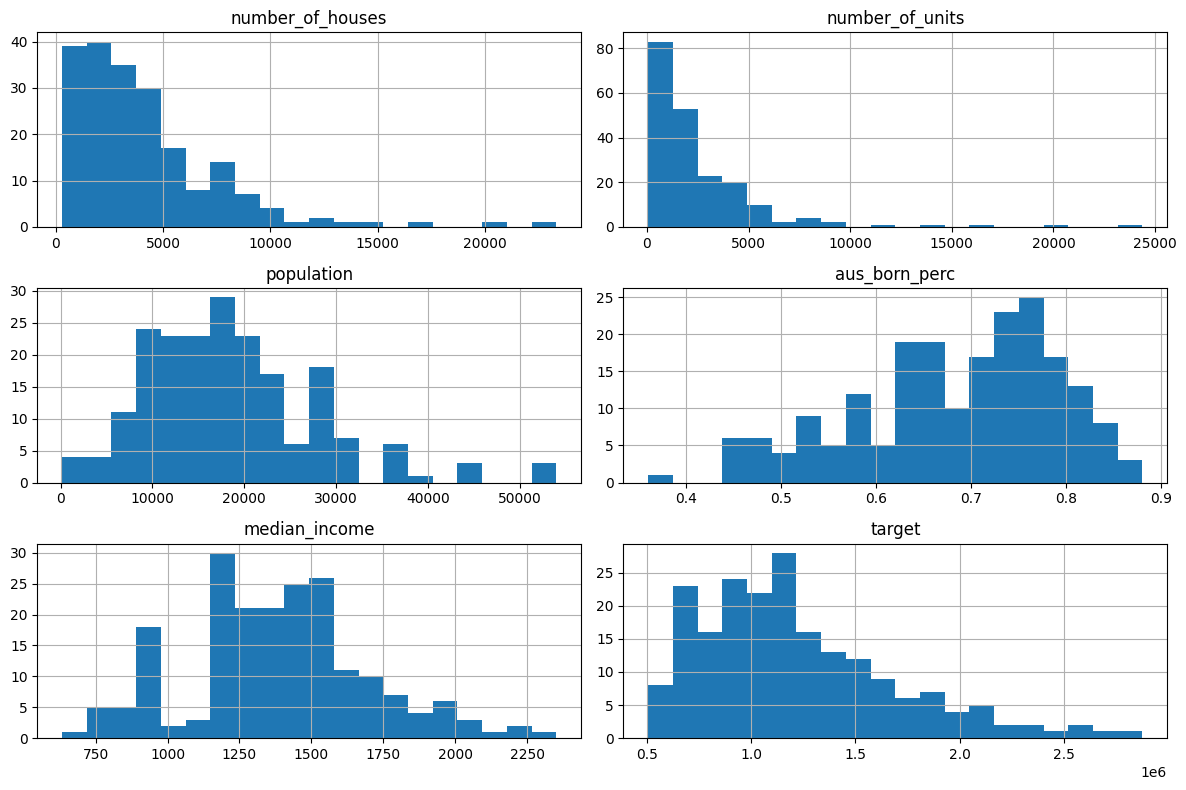

In [ ]:
# Plotting histograms
df_xlsx_selected.hist(bins=20, figsize=(12, 8), layout=(3, 2))
plt.tight_layout()
plt.show()

In [ ]:
skewness_values = skew(df_xlsx_selected)

# Create a DataFrame to display the skewness
skewness_df = pd.DataFrame({
    'Variable': df_xlsx_selected.columns,
    'Skewness': skewness_values
})

print(skewness_df)

           Variable  Skewness
0  number_of_houses  2.140141
1   number_of_units  3.603153
2        population  1.077785
3     aus_born_perc -0.563670
4     median_income  0.171234
5            target  1.025572


From the histogram and the skewness value we got:

- number_of_houses and number_of_units are heavily right-skewed, with skewness values of 2.14 and 3.60, respectively. This indicates that these variables have a long tail on the right, meaning there are a few suburbs with a disproportionately large number of houses or units compared to most others.

- aus_born_perc has a slightly negative skew (-0.56), which suggests a slightly longer left tail, meaning there are suburbs where a smaller percentage of residents are Australian-born, but this is less extreme.

- population, median_income and target have relatively lower skewness, meaning their distributions are closer to normal, although target still shows mild right skewness.

- In the histograms for number_of_houses and number_of_units, there are a few extreme values (outliers) that could significantly affect the regression model, as they could lead to heteroscedasticity (non-constant variance of residuals).

Next, let's check whether each of the features have outliers using box plot.

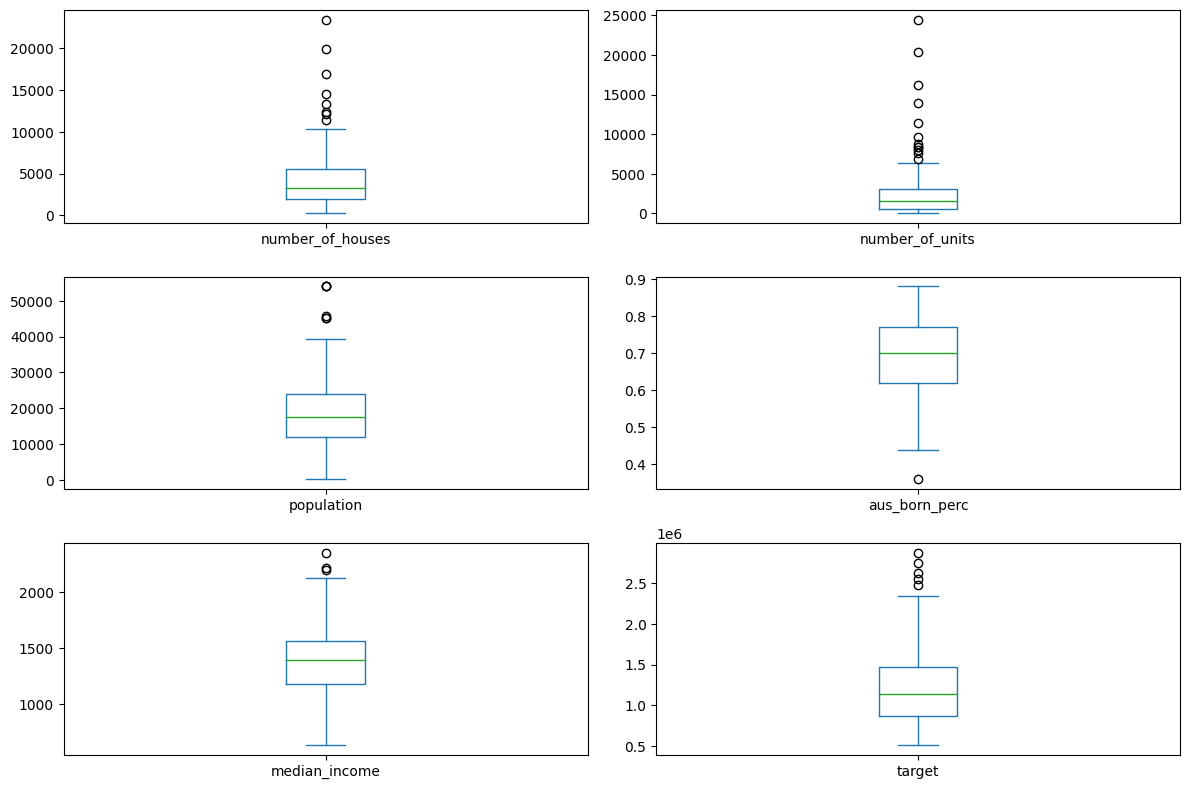

In [ ]:
# Creating box plots for each variable
df_xlsx_selected.plot(kind='box', subplots=True, layout=(3, 2), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

- number_of_houses, number_of_units, population, median_income, and target (likely median_house_price) all show the presence of outliers, which can distort the results of linear regression if left untreated.

- For number_of_houses and number_of_units, there are extreme values, especially for number_of_units, where the values are quite concentrated at the lower end but with several high outliers above 20,000.

- population also has a few outliers above 40,000, although they are not as extreme as the unit count.

- median_income shows fewer extreme outliers, but they are still present.

- target has a few outliers above 2.5 million, which could heavily influence the model due to the magnitude of the difference compared to most observations.

Now, let's see the scatterplot

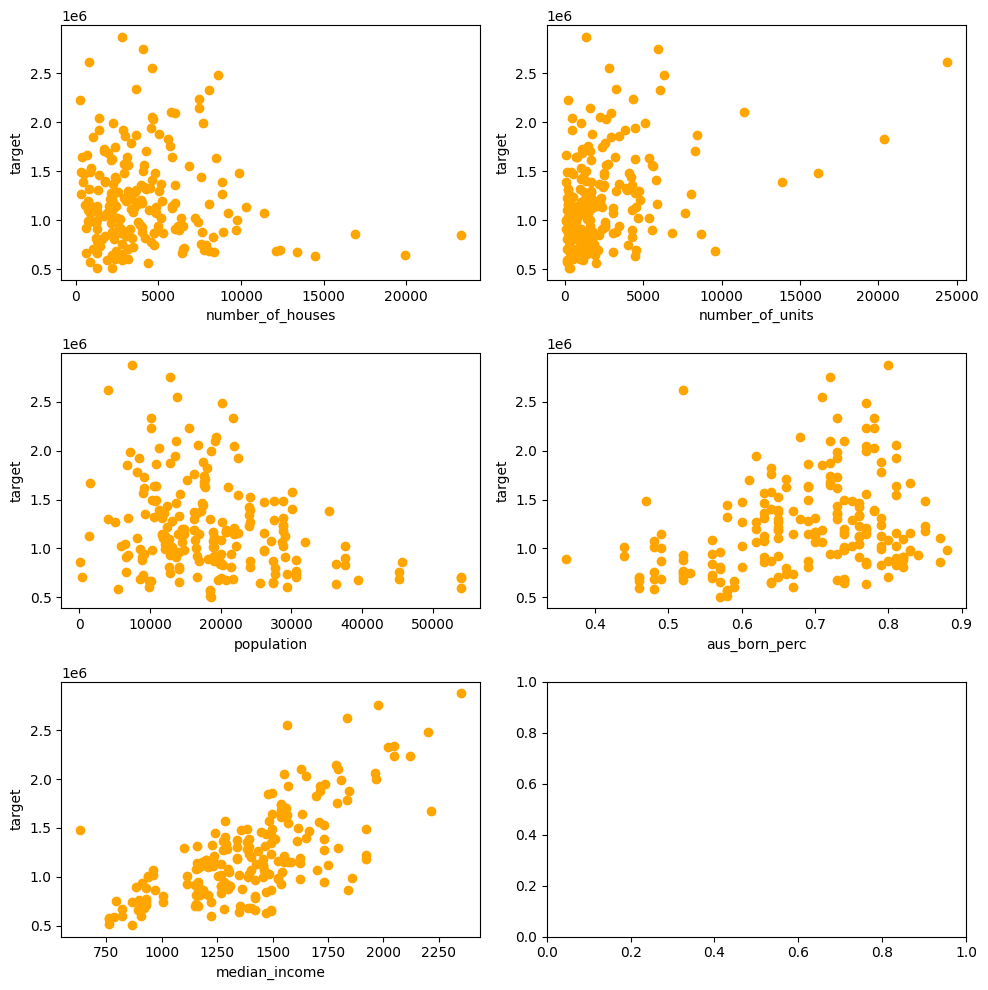

In [ ]:
# Creating scatter plots for each variable against the 'target' column
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

columns = df_xlsx_selected.columns.drop('target')

for i, col in enumerate(columns):
    row, col_idx = divmod(i, 2)
    axes[row, col_idx].scatter(df_xlsx_selected[col], df_xlsx_selected['target'], color='orange')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('target')

plt.tight_layout()
plt.show()

- number_of_houses shows a weak, almost non-existent relationship with the target. The data is widely scattered, and no clear trend emerges.

- number_of_units shows a weak relationship, with no clear trend. The outliers at higher unit counts could distort the model.

- population shows a weak and scattered relationship with the target. There are several outliers at higher population counts.

- aus_born_perc shows no clear relationship with the target. The data is widely spread across the range.

- median_income shows the clearest positive linear relationship with the target. As median_income increases, house prices tend to increase in a more predictable fashion.

Let's check the correlation.

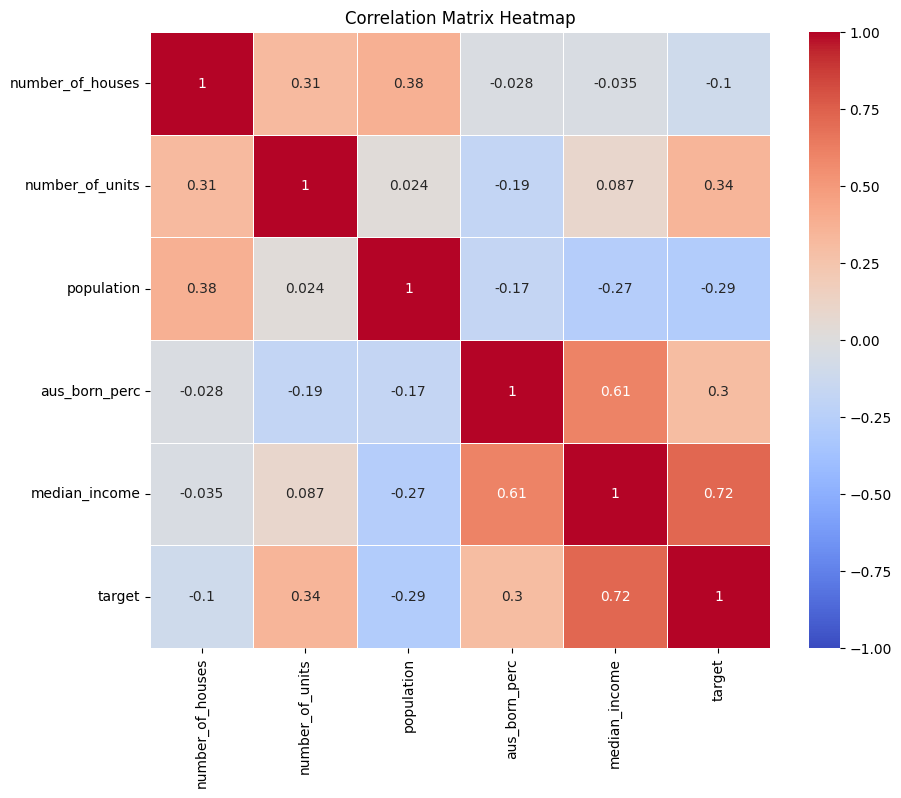

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df_xlsx_selected.corr()

# Display the correlation matrix
correlation_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- number_of_houses has a weak negative correlation with the target (-0.1). This suggests that number_of_houses is not a strong predictor of house prices, and the relationship is weak and slightly inverse.

- number_of_units has a moderate positive correlation with the target (0.34). This means number_of_units is a somewhat useful predictor of house prices, though the relationship is still not very strong.

- population exhibits a weak negative correlation with the target (-0.29). This suggests that as population increases, house prices tend to decrease slightly, but the relationship is not strong.

- aus_born_perc has a weak positive correlation with the target (0.3), suggesting that there is a slight positive association between the percentage of Australian-born residents and house prices, but it's not strong.

- median_income has a strong positive correlation with the target (0.72), making it the best predictor among the available features.

- aus_born_perc and median_income have a correlation of 0.61. While this isn’t extremely high, it indicates some multicollinearity between these two variables.

-------------------------------------

<div class="alert alert-block alert-warning">

## 7. Data Transformation and Data Scaling <a class="anchor" name="dt_and_ds"></a>

 </div>

Data transformation should be performed before scaling in this dataset for several key reasons:

- Data transformation should be done before scaling to avoid issues with methods like log or Box-Cox, which require positive values. Scaling first, especially in datasets with outliers, can introduce negative values that invalidate these transformations. Since the dataset is already positive but contains outliers, applying scaling first will not be a very logical move.

- If the transformation effectively improves the data (data is scaled), scaling may no longer be required, reducing preprocessing steps.

- Transforming the data first helps address issues like skewness and outliers, leading to better model accuracy. Scaling afterward can enhance numerical stability and optimization, but only if still necessary (Box & Cox, 1964).

-------------------------------------

<div class="alert alert-block alert-warning">

### 7.1. Data Transformation <a class="anchor" name="transformation"></a>

 </div>

Purpose of Data Transformation

1. **Establish a linear relationship**: Transformation helps features exhibit a more linear relationship with the target variable, making them suitable for linear regression models.
   
2. **Normalize the data**: It assists in making the distribution more normal, reducing skewness and improving model performance.

Common Methods for Data Transformation (Ordered by Tukey and Mosteller’s Bulging Rule)

1. **Reciprocal Transformation**
   \begin{equation}
   y = \frac{1}{x}
   \end{equation}
   Used to reduce the spread of highly skewed data and stabilize variance in inverse relationships. It cannot be applied to zero or negative values.

2. **Inverse Square Root Transformation (Inverse Root)**
   \begin{equation}
   y = \frac{1}{\sqrt{x}}
   \end{equation}
   Helps reduce skewness and variance, similar to the reciprocal transformation but less aggressively.

3. **Logarithmic Transformation**
   \begin{equation}
   y = \log(x)
   \end{equation}
   Commonly used when the data spans several orders of magnitude or grows exponentially. It is a more moderate transformation compared to reciprocal or inverse root.

4. **Square Root Transformation**
   \begin{equation}
   y = \sqrt{x}
   \end{equation}
   Used for reducing right skewness in data. It’s suitable for data that follows a Poisson distribution or count data.

5. **Cube Root Transformation**
   \begin{equation}
   y = \sqrt[3]{x}
   \end{equation}
   Less aggressive than square root and can handle both positive and negative values. It’s used for moderate skewness in the data.

6. **Box-Cox Transformation**
   \begin{equation}
   y = \frac{x^\lambda - 1}{\lambda} \quad \text{for} \ \lambda \neq 0
   \end{equation}
   \begin{equation}
   y = \log(x) \quad \text{for} \ \lambda = 0
   \end{equation}
   The Box-Cox method optimizes the value of $λ$ to achieve the best possible normalization and linearization of the data.

7. **Exponential Transformation**
  \begin{equation}
  y = e^{x}
  \end{equation}
  This transformation is typically used when the relationship grows rapidly, reversing the effects of logarithmic transformations.


8. **Power Transformation**
  \begin{equation}
  y = x^{n} \quad \text{for} \\ n = 1,2,3,...
  \end{equation}
  Power transformations apply increasing powers to the data to reduce or stabilize skewness, with higher powers making the data more symmetric.

(Abdallah, 2016)

Tukey and Mosteller’s Bulging Rule and the Ladder of Transformations

The **Bulging Rule**, proposed by John Tukey and Frederick Mosteller, provides guidance on which transformations to use based on the shape of the relationship between two variables. The rule is often visualized as a "ladder of powers" where different transformations are applied depending on whether the relationship is concave or convex.

By following the ladder, the goal is to linearize relationships and reduce skewness to make data more amenable to analysis, particularly in regression models (Abdallah, 2016).


-------------------------------------

#### Target Variable

Since we are building a linear regression model with many features, it’s more efficient to start by transforming the target variable rather than each feature individually (Box & Cox, 1964). One way to determine the appropriate transformation for the target variable is by analyzing the residual plot, which can help us identify the best transformation to improve model fit. Therefore, we will begin by focusing on transforming the target variable before addressing other aspects of the model.

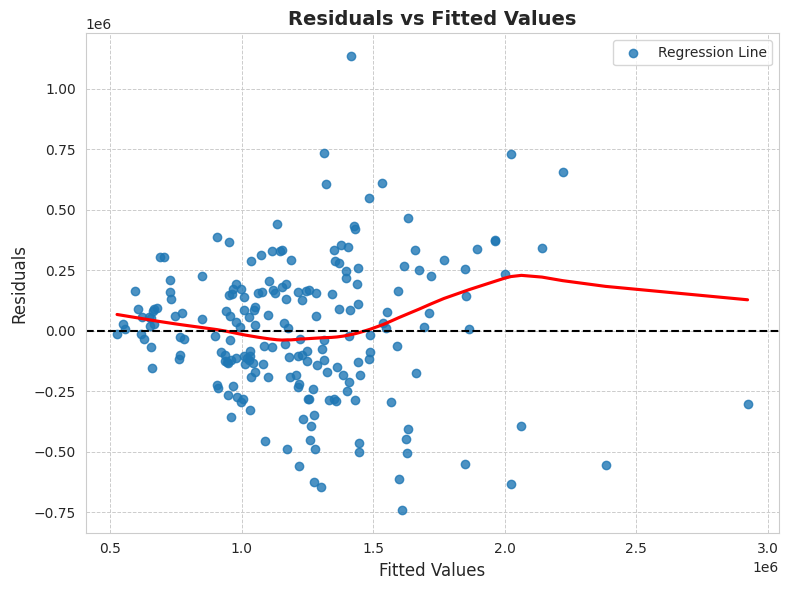

In [ ]:
plot_single_residual(df_xlsx_selected, "target", residual_vs_fitted=True)

The residual plot shows high variance in the residuals, indicating a lack of homoscedasticity. Additionally, the red line reveals that the relationship is not linear.

This indicate that we need to do non-linear transformation or variance-stabilising transformation.

It is also seen that the points are not near zero, thus we need to apply scaling to the target variable.

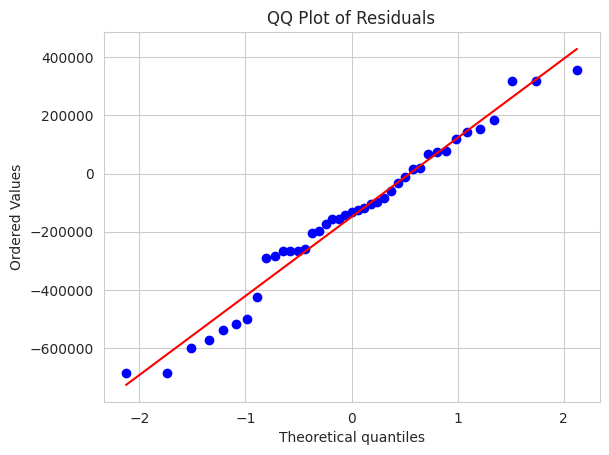

In [ ]:
qq_plot_residuals(df_xlsx_selected, "target")

The QQ plot indicates that the residuals follow a normal distribution, satisfying the normality assumption. Therefore, we only need to focus on transforming the target variable to meet the other assumptions, as indicated by the residual plot.

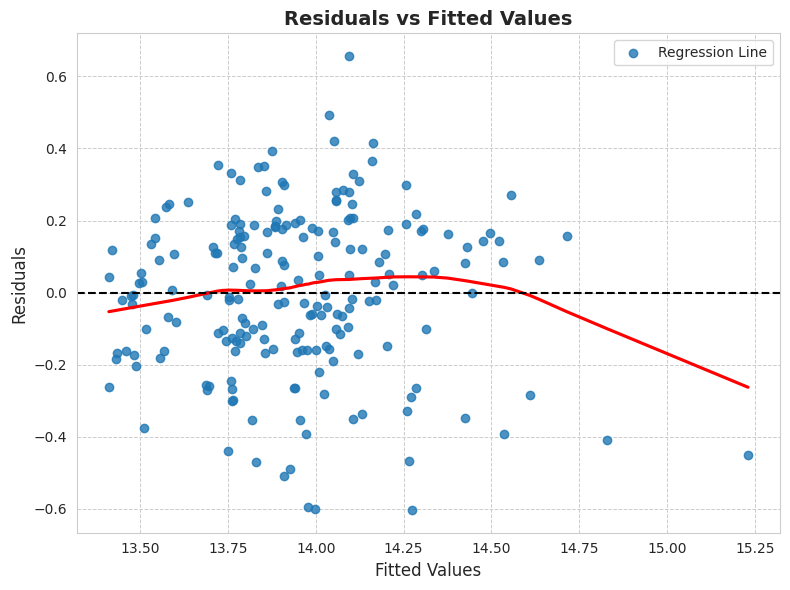

In [ ]:
# keep the raw data for later use
df_final = df_xlsx_selected.copy()

# transform the target variable
df_final['target'] = np.log(df_xlsx_selected['target'])

plot_single_residual(df_final, "target", residual_vs_fitted=True)

Among all the transformations, the logarithmic transformation performed the best for the target variable, as it improved homoscedasticity in the residual plot. However, the relationship is still not fully linear.

-------------------------------------

#### Other Feature

Next, we will apply transformations to the other features relative to the "log-transformed target variable," following these criteria in order:

- Linearity with the target variable
- Skewness (ideally with |skewness| less than 0.5)
- Highest correlation

The goal is to make the features as linear as possible, while maintaining an acceptable skewness range and maximizing their correlation with the target variable.

One strategy for selecting the transformation method is to reference Tukey and Mosteller’s Bulging Rule and assess which correlation yields better results compared to the Box-Cox transformation. Since Box-Cox addresses skewness, we want to determine if manual adjustments provide better correlations than the automatic Box-Cox transformation (Box & Cox, 1964).

-------------------------------------

##### number_of_houses

In [ ]:
# df_check is used to check the residual plot, make the model constant (not changing due to transformation) for plotting
df_check = df_final.copy()

{'feature': 'number_of_houses', 'correlation': -0.1310035525599464, 'skewness': 2.140140964122969}


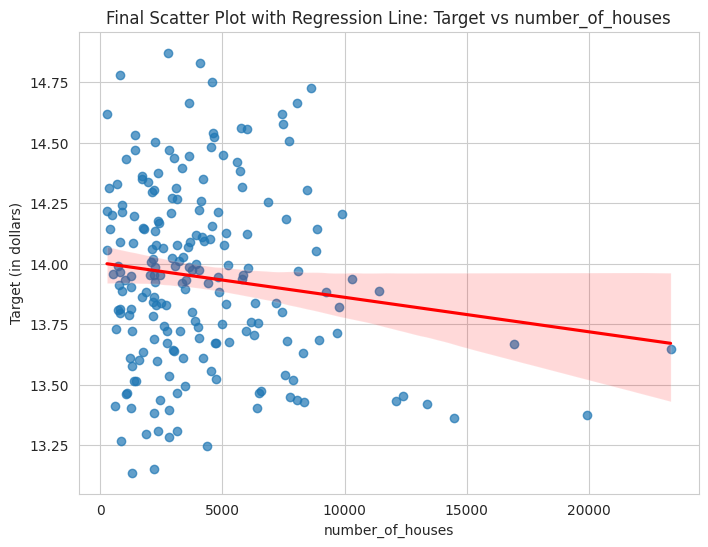

In [ ]:
print(feature_correlation_skewness(df_check, "number_of_houses"))
scatter_plot(df_check, 'number_of_houses')

The scatter plot shows a weak correlation with many outliers, and the data is sparse. Based on its appearance, the plot seems to fit into Quadrant 3 of Tukey and Mosteller’s Bulging Rule, indicating that we should apply a downward transformation for "number_of_houses."

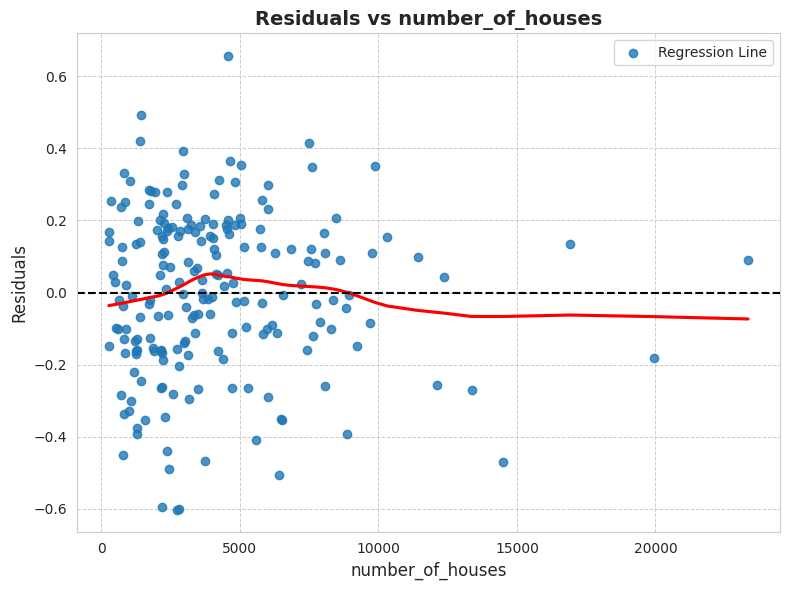

In [ ]:
plot_single_residual(df_check, "target", "number_of_houses")

The residual plot shows that the residuals for "number_of_houses" are not evenly distributed around zero and do not follow a linear pattern. Furthermore, there appears to be heteroscedasticity, with a decreasing trend in variance, suggesting unequal variance, particularly higher variance at certain points.

Based on this analysis, we applied the following feature transformations:
- Log transformation
- Square root transformation
- Cube root transformation
- Reciprocal transformation
- Box Cox transformation

In [ ]:
# creating new df, to check every single values
df_test = df_final.copy()

# checking every transformation that falls within criteria
print("Log transformation:")
check_transformation(df_test, "log", "number_of_houses")

print("Square Root transformation:")
check_transformation(df_test, "sqrt", "number_of_houses")

print("Cube Root transformation:")
check_transformation(df_test, "cube_root", "number_of_houses")

print("Reciprocal transformation:")
check_transformation(df_test, "reciprocal", "number_of_houses")

print("BoxCox transformation:")
check_transformation(df_test, "boxcox", "number_of_houses")

Log transformation:
{'feature': 'number_of_houses', 'correlation': -0.07877992897523665, 'skewness': -0.439168188821236}
Square Root transformation:
{'feature': 'number_of_houses', 'correlation': -0.0995661899379045, 'skewness': 0.7567904262337852}
Cube Root transformation:
{'feature': 'number_of_houses', 'correlation': -0.09063932894560003, 'skewness': 0.3503357020226821}
Reciprocal transformation:
{'feature': 'number_of_houses', 'correlation': 0.09726499857572705, 'skewness': 3.17139172956864}
BoxCox transformation:
{'feature': 'number_of_houses', 'correlation': -0.08414248797969565, 'skewness': -0.006357916770510056}


The results show that the transformation meeting our criteria falls between the square root and cube root transformations.

{'feature': 'number_of_houses', 'correlation': -0.09297809429677834, 'skewness': 0.46246283070402794}


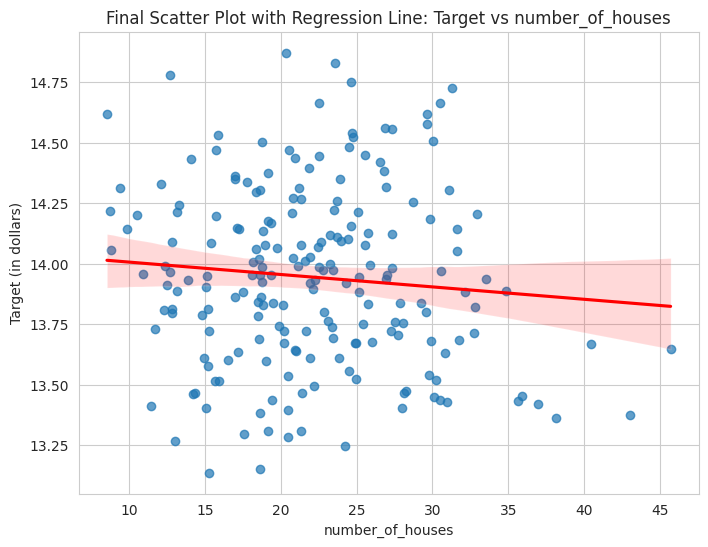

In [ ]:
# creating new df, to check every single values
df_test = df_final.copy()

# transform the feature
df_test["number_of_houses"] = (df_test["number_of_houses"])**(0.38)

print(feature_correlation_skewness(df_test, "number_of_houses"))
scatter_plot(df_test, 'number_of_houses')

After experimenting, in betwen cube root and root transformation works best. It meets most of our criteria and it defeates the box-cox transformation.

In [ ]:
# replace the df_final with the corrected df
df_final = df_test

-------------------------------------

##### number_of_units

{'feature': 'number_of_units', 'correlation': 0.3192756691766988, 'skewness': 3.6031528767526644}


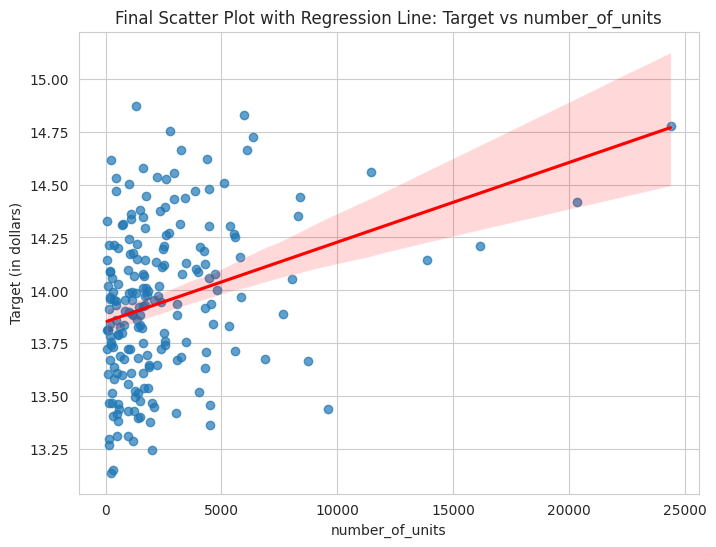

In [ ]:
print(feature_correlation_skewness(df_check, "number_of_units"))
scatter_plot(df_check, 'number_of_units')

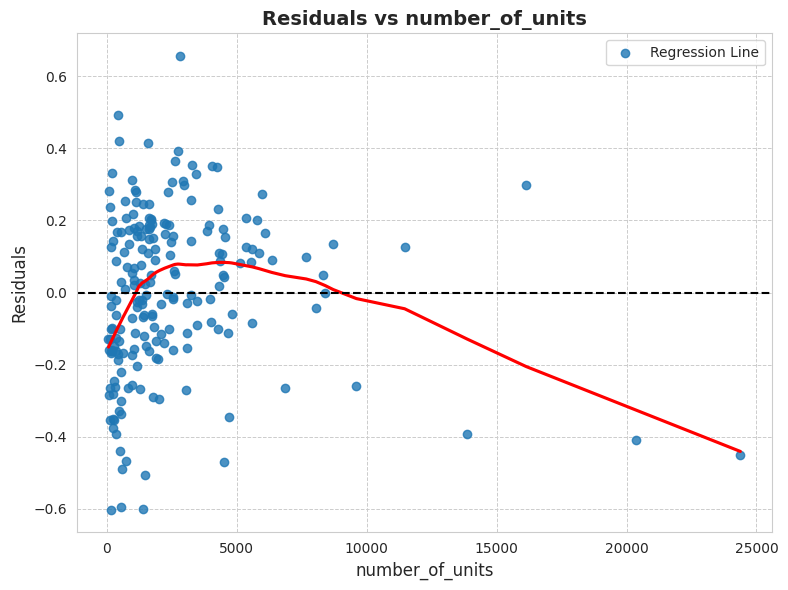

In [ ]:
plot_single_residual(df_check, "target", "number_of_units")

Similar to **number_of_houses**, the scatter plot for **number_of_units** displays a weak correlation, numerous outliers, and sparse data. The residual plot indicates that the feature is not linear and suggests heteroscedasticity, with a high variance that trends downward.

The plot aligns with Quadrant 2 of Tukey and Mosteller’s Bulging Rule, suggesting that a downward transformation is appropriate for **number_of_units**.

Based on this analysis, we applied the following feature transformations:
- Log transformation
- Square root transformation
- Cube root transformation
- Reciprocal transformation
- Box-Cox transformation

In [ ]:
# creating new df, to check every single values
df_test = df_final.copy()

# checking every transformation that falls within criteria
print("Log transformation:")
check_transformation(df_test, "log", "number_of_units")

print("Square Root transformation:")
check_transformation(df_test, "sqrt", "number_of_units")

print("Cube Root transformation:")
check_transformation(df_test, "cube_root", "number_of_units")

print("Reciprocal transformation:")
check_transformation(df_test, "reciprocal", "number_of_units")

print("BoxCox transformation:")
check_transformation(df_test, "boxcox", "number_of_units")

Log transformation:
{'feature': 'number_of_units', 'correlation': 0.3096857569160915, 'skewness': -0.39645744979001885}
Square Root transformation:
{'feature': 'number_of_units', 'correlation': 0.3404781855223065, 'skewness': 1.3140600757122027}
Cube Root transformation:
{'feature': 'number_of_units', 'correlation': 0.33676672100117133, 'skewness': 0.677432932539046}
Reciprocal transformation:
{'feature': 'number_of_units', 'correlation': -0.16203817433154336, 'skewness': 3.0669393200896473}
BoxCox transformation:
{'feature': 'number_of_units', 'correlation': 0.32291758044693125, 'skewness': -0.014002383925763754}


It could be seen that most likely it will be above the cube root transformation.

{'feature': 'number_of_units', 'correlation': 0.32970271199684964, 'skewness': 0.2527392504420774}


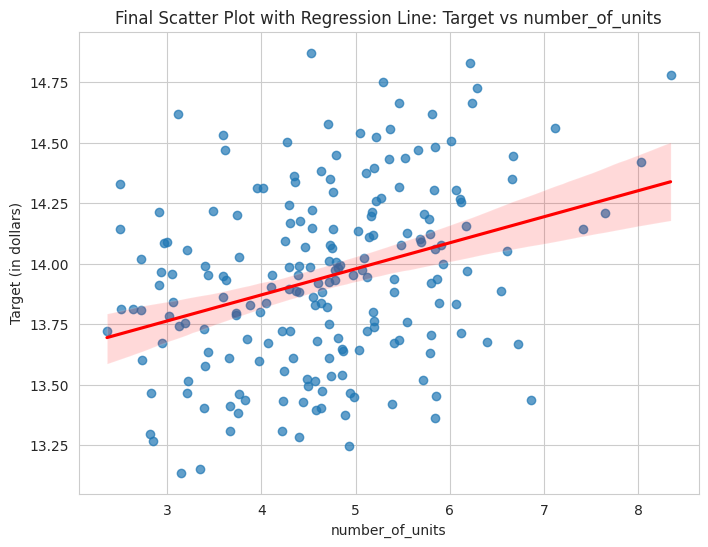

In [ ]:
df_test["number_of_units"]= (df_test["number_of_units"]) ** (0.21)

print(feature_correlation_skewness(df_test, "number_of_units"))
scatter_plot(df_test, 'number_of_units')

After testing different values, 0.21 proved to be the most effective, striking a balance between skewness and correlation. While the drop in correlation from 0.22 to 0.21 is minimal, the reduction in skewness is significant. This value meets most of our criteria and outperforms the Box-Cox transformation.

In [ ]:
df_final = df_test

-------------------------------------

##### population

{'feature': 'population', 'correlation': -0.29851484151189, 'skewness': 1.0777853796795283}


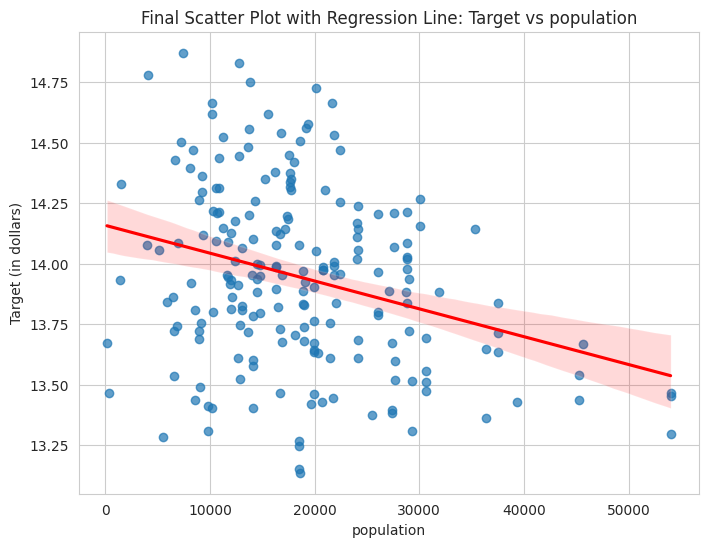

In [ ]:
print(feature_correlation_skewness(df_check, "population"))
scatter_plot(df_check, 'population')

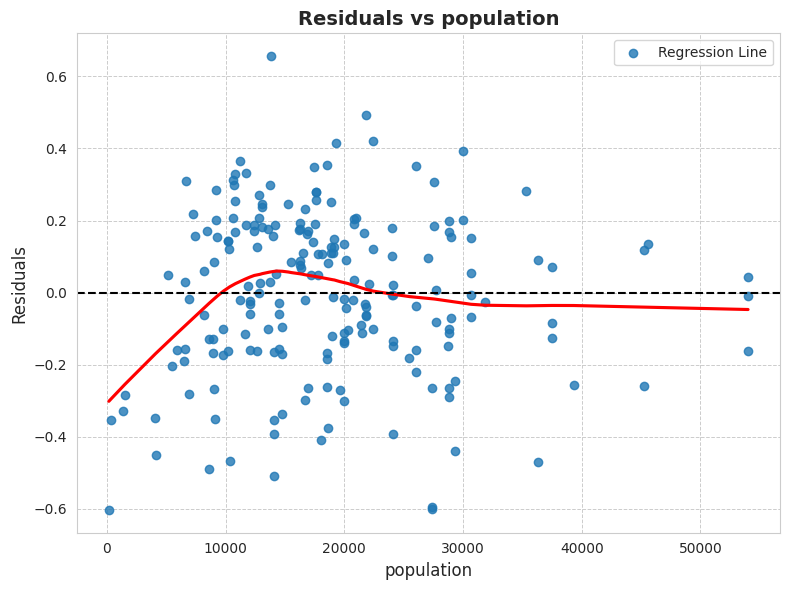

In [ ]:
plot_single_residual(df_check, "target", "population")

The scatter plot suggests a weak negative linear relationship between population and the target variable, with data widely scattered and a large confidence interval, indicating uncertainty in the model fit. The residual plot shows curvature, especially at the extremes of the population values, with residuals spreading more as population increases, suggesting both heteroscedasticity and non-linearity.

According to Tukey and Mosteller’s Bulging Rule, the plot aligns with Quadrant 3, indicating a downward transformation is needed for "number_of_units."

Based on this analysis, we applied the following feature transformations:
- Log transformation
- Square root transformation
- Cube root transformation
- Reciprocal transformation
- Box-Cox transformation.

In [ ]:
# creating new df, to check every single values
df_test = df_final.copy()

# checking every transformation that falls within criteria
print("Log transformation:")
check_transformation(df_test, "log", "population")

print("Square Root transformation:")
check_transformation(df_test, "sqrt", "population")

print("Cube Root transformation:")
check_transformation(df_test, "cube_root", "population")

print("Reciprocal transformation:")
check_transformation(df_test, "reciprocal", "population")

print("BoxCox transformation:")
check_transformation(df_test, "boxcox", "population")

Log transformation:
{'feature': 'population', 'correlation': -0.1531221359406473, 'skewness': -2.6254466389566558}
Square Root transformation:
{'feature': 'population', 'correlation': -0.2542705633546445, 'skewness': -0.028562159896377334}
Cube Root transformation:
{'feature': 'population', 'correlation': -0.22904508691881323, 'skewness': -0.5973328654023142}
Reciprocal transformation:
{'feature': 'population', 'correlation': -0.061981511923136536, 'skewness': 11.034890025197958}
BoxCox transformation:
{'feature': 'population', 'correlation': -0.2600269707493375, 'skewness': 0.09973484407248222}


As the result shows us, the root degree is probabily near the square root.

{'feature': 'population', 'correlation': -0.2705646944930913, 'skewness': 0.33859623287975055}


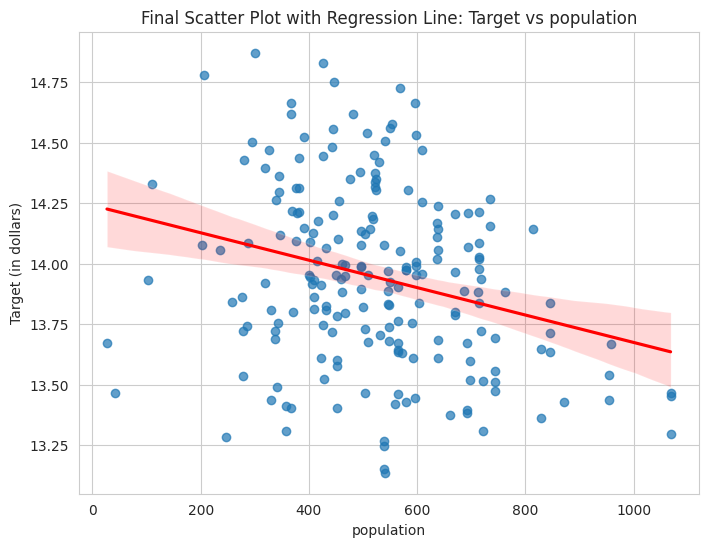

In [ ]:
df_test["population"] = (df_test["population"])**(0.64)

print(feature_correlation_skewness(df_test, "population"))
scatter_plot(df_test, 'population')

After testing different values, 0.64 proved to be the most effective, striking a balance between skewness and correlation. This value meets most of our criteria and outperforms the Box-Cox transformation.

In [ ]:
df_final = df_test

-------------------------------------

##### aus_born_perc

{'feature': 'aus_born_perc', 'correlation': 0.34721411721848133, 'skewness': -0.5636700025239073}


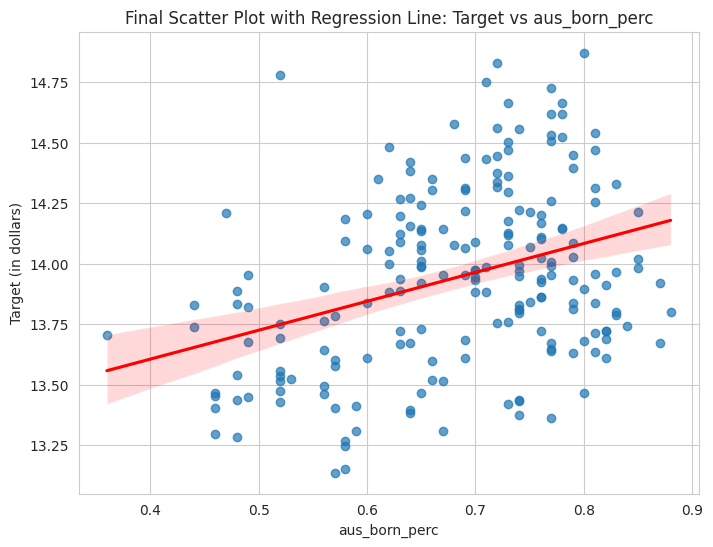

In [ ]:
print(feature_correlation_skewness(df_check, "aus_born_perc"))
scatter_plot(df_check, 'aus_born_perc')

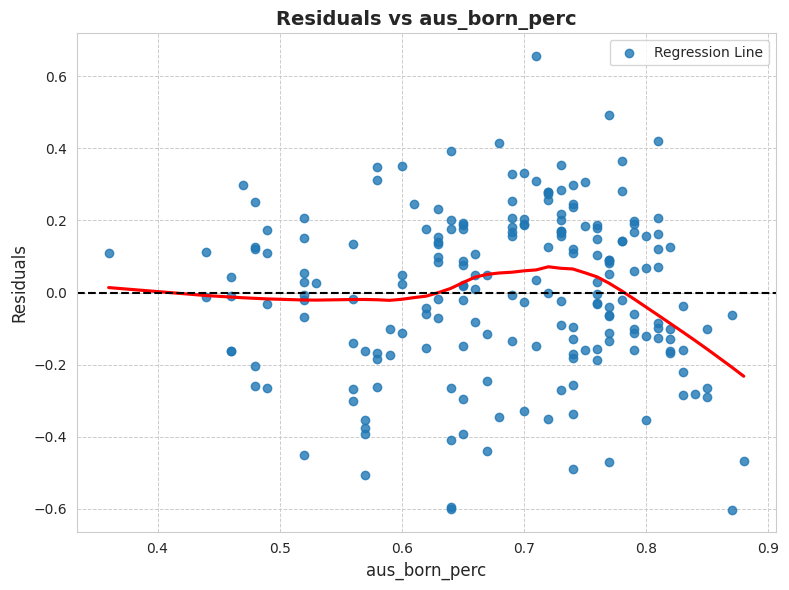

In [ ]:
plot_single_residual(df_check, "target", "aus_born_perc")

The scatter plot reveals a moderately positive linear relationship between aus_born_perc and the target, indicating that this feature already aligns reasonably well with the target in terms of linearity. The confidence interval is relatively narrow, suggesting the linear model is performing adequately for this feature. In the residual plot, there is some curvature, particularly between the 0.6 and 0.8 range of aus_born_perc, implying that the relationship may not be perfectly linear. Additionally, the residuals show a slight fanning out, indicating minor heteroscedasticity, though it is less pronounced compared to other features.

Suggested transformation:
- Square Transformation
- Cubic Transformation
- Exponential Transformation
- Boxcox Transformation

In [ ]:
# creating new df, to check every single values
df_test = df_final.copy()

# checking every transformation that falls within criteria
print("Cube Root transformation:")
check_transformation(df_test, "exp", "aus_born_perc")

print("Log transformation:")
check_transformation(df_test, "square", "aus_born_perc")

print("Square Root transformation:")
check_transformation(df_test, "cube", "aus_born_perc")

print("BoxCox transformation:")
check_transformation(df_test, "boxcox", "aus_born_perc")

Cube Root transformation:
{'feature': 'aus_born_perc', 'correlation': 0.33579817025098185, 'skewness': -0.36212079185948}
Log transformation:
{'feature': 'aus_born_perc', 'correlation': 0.3299282712986824, 'skewness': -0.25788603300360097}
Square Root transformation:
{'feature': 'aus_born_perc', 'correlation': 0.30906817267267656, 'skewness': 0.018449028624731915}
BoxCox transformation:
{'feature': 'aus_born_perc', 'correlation': 0.320667495032066, 'skewness': -0.12766503588102177}


From looking at the result, the power degree could be around 1 to 2.

{'feature': 'aus_born_perc', 'correlation': 0.34083303152917427, 'skewness': -0.4369174259185975}


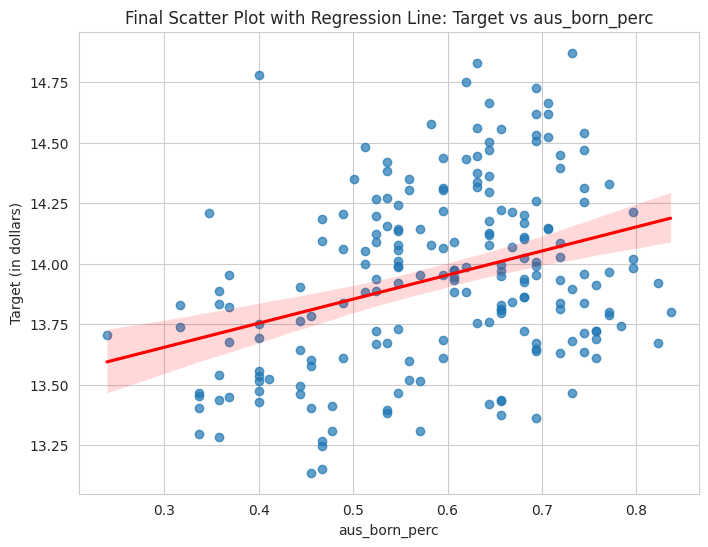

In [ ]:
df_test = df_final.copy()
df_test["aus_born_perc"] = (df_test["aus_born_perc"])**(1.4)

print(feature_correlation_skewness(df_test, "aus_born_perc"))
scatter_plot(df_test, 'aus_born_perc')

Since the power of 1.4 meets the criteria and performs better than the Box-Cox transformation, we have selected the power of 1.4.

In [ ]:
df_final = df_test

-------------------------------------

##### median_income

{'feature': 'median_income', 'correlation': 0.7198224684261464, 'skewness': 0.17123435872628145}


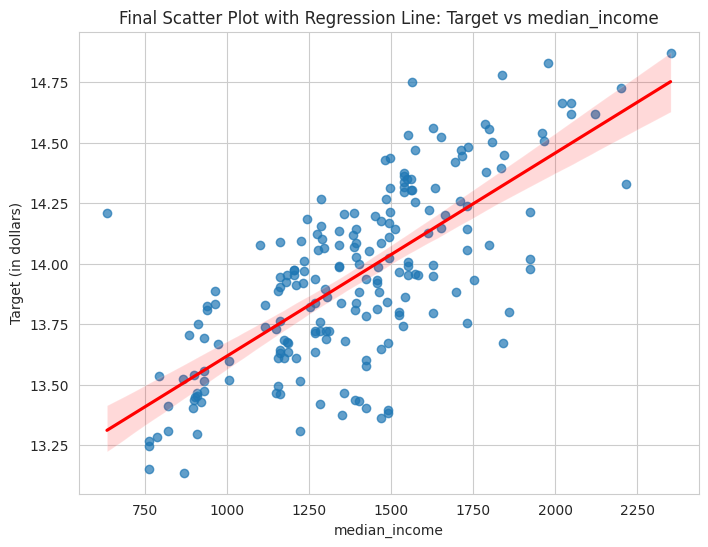

In [ ]:
print(feature_correlation_skewness(df_check, "median_income"))
scatter_plot(df_check, 'median_income')

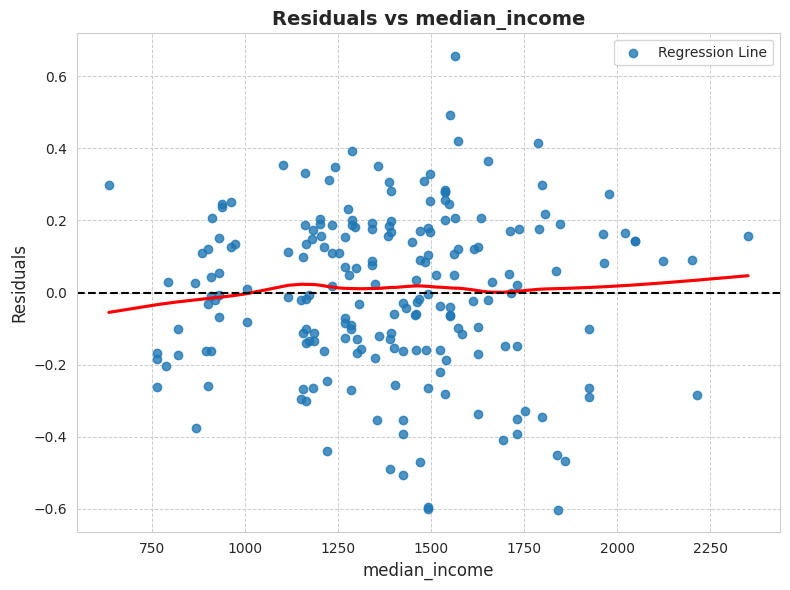

In [ ]:
plot_single_residual(df_check, "target", "median_income")

The scatter plot shows a strong positive linear relationship between median_income and the target variable, with a clear upward trend. The data points are well-distributed along the regression line, and the narrow confidence interval suggests that the linear model fits the data well. The residual plot reveals slight curvature, but overall, the residuals are evenly distributed around zero. There is a minor amount of heteroscedasticity, with slightly higher residual variance for lower median_income values, though this is not a significant concern.

From these plots, it is clear that median_income already meets the necessary criteria, so we will compare it only with the Box-Cox transformation.

{'feature': 'median_income', 'correlation': 0.7174685146999116, 'skewness': -0.008346732789838749}


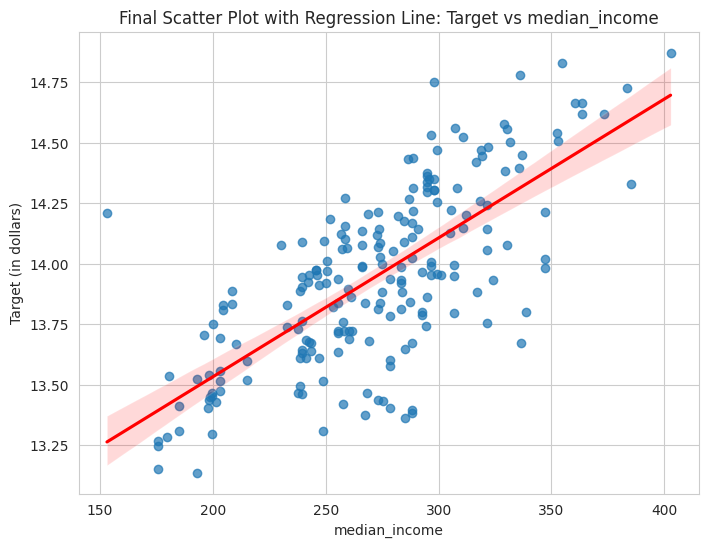

In [ ]:
# creating new df, to check every single values
df_test = df_final.copy()
df_test["median_income"], h = boxcox(df_test["median_income"])

print(feature_correlation_skewness(df_test, "median_income"))
scatter_plot(df_test, 'median_income')

The Box-Cox transformation significantly reduces skewness while only slightly affecting the correlation. Therefore, we will proceed with the Box-Cox transformation.

In [ ]:
df_final = df_test

-------------------------------------

<div class="alert alert-block alert-warning">

### 7.2. Data Scaling <a class="anchor" name="scaling"></a>

 </div>

**Next is data scaling, and the purpose of data scaling is:**

1. **Standardize feature magnitudes**: To ensure all features are on the same scale, preventing features with larger values from dominating the model.
   
2. **Improve model performance**: Many machine learning algorithms, particularly distance-based ones, perform better when features are scaled uniformly.

3. **Accelerate convergence**: Scaling can help optimization algorithms, like gradient descent, converge faster during model training.

4. **Enhance interpretability**: When features are scaled consistently, it becomes easier to interpret the model coefficients and understand the relative importance of different features, especially in linear models.


**There are several common methods for data scaling:**

1. **Standardization**  
   Standardization involves rescaling the data so that it has a mean of 0 and a standard deviation of 1. This method ensures that all features are centered and have the same spread.
   \begin{equation}
   z = \frac{x - \mu}{\sigma}
   \end{equation}
   Where $μ$ is the mean and $σ$ is the standard deviation.
   Standardization is useful when the data follows a normal distribution or when the model assumes normally distributed features (e.g., linear regression).


2. **Normalization**  
   Normalization scales the features to a fixed range, typically [0, 1] or [-1, 1], depending on the method.
   
   Examples of normalization methods:
   - **Min-Max Scaling**:  
     This rescales data to a range of [0, 1], ensuring that the smallest value is 0 and the largest value is 1.
     \begin{equation}
     x' = \frac{x - \min(x)}{\max(x) - \min(x)}
     \end{equation}
   - **MaxAbs Scaling**:  
     This scales the data by dividing each feature by its maximum absolute value, keeping the data between [-1, 1].
   - **Robust Scaling**:  
     Instead of using the mean and standard deviation, it scales based on the interquartile range (IQR), making it less sensitive to outliers.
      \begin{equation}
     x' = \frac{x - \text{median}(x)}{\text{IQR}(x)}
     \end{equation}

(Abdallah, 2016)


**Criteria for choosing the scaling method:**

- **Outliers**:  
  If the data contains significant outliers, robust scaling methods (like IQR-based scaling) are preferable, as they are less influenced by extreme values (Cao, Stojkovic, & Obradovic, 2016).
  
- **Assumption of distribution**:  
  Some models, like linear regression, assume normally distributed data, making standardization more suitable. For algorithms that don’t assume any specific distribution, normalization (like min-max scaling) may be sufficient (James, Witten, Hastie, & Tibshirani, 2013).

- **Machine learning model**:  
  Different models have different scaling requirements. For instance, neural networks and models like k-nearest neighbors (KNN) are highly sensitive to feature magnitudes, so normalization or standardization is crucial (LeCun, Bengio, & Hinton, 2015). Linear regression, however, is less sensitive to the specific scaling method compared to more complex models like neural networks.


Since we are using **linear regression** (especially using OLS), there is no strict preference for one scaling method over another, unlike neural networks or other models where scaling plays a more critical role. Therefore, the choice of scaling depends more on the specific characteristics of the data, such as outliers and distribution, while ensuring the model remains interpretable (James, Witten, Hastie, & Tibshirani, 2013).

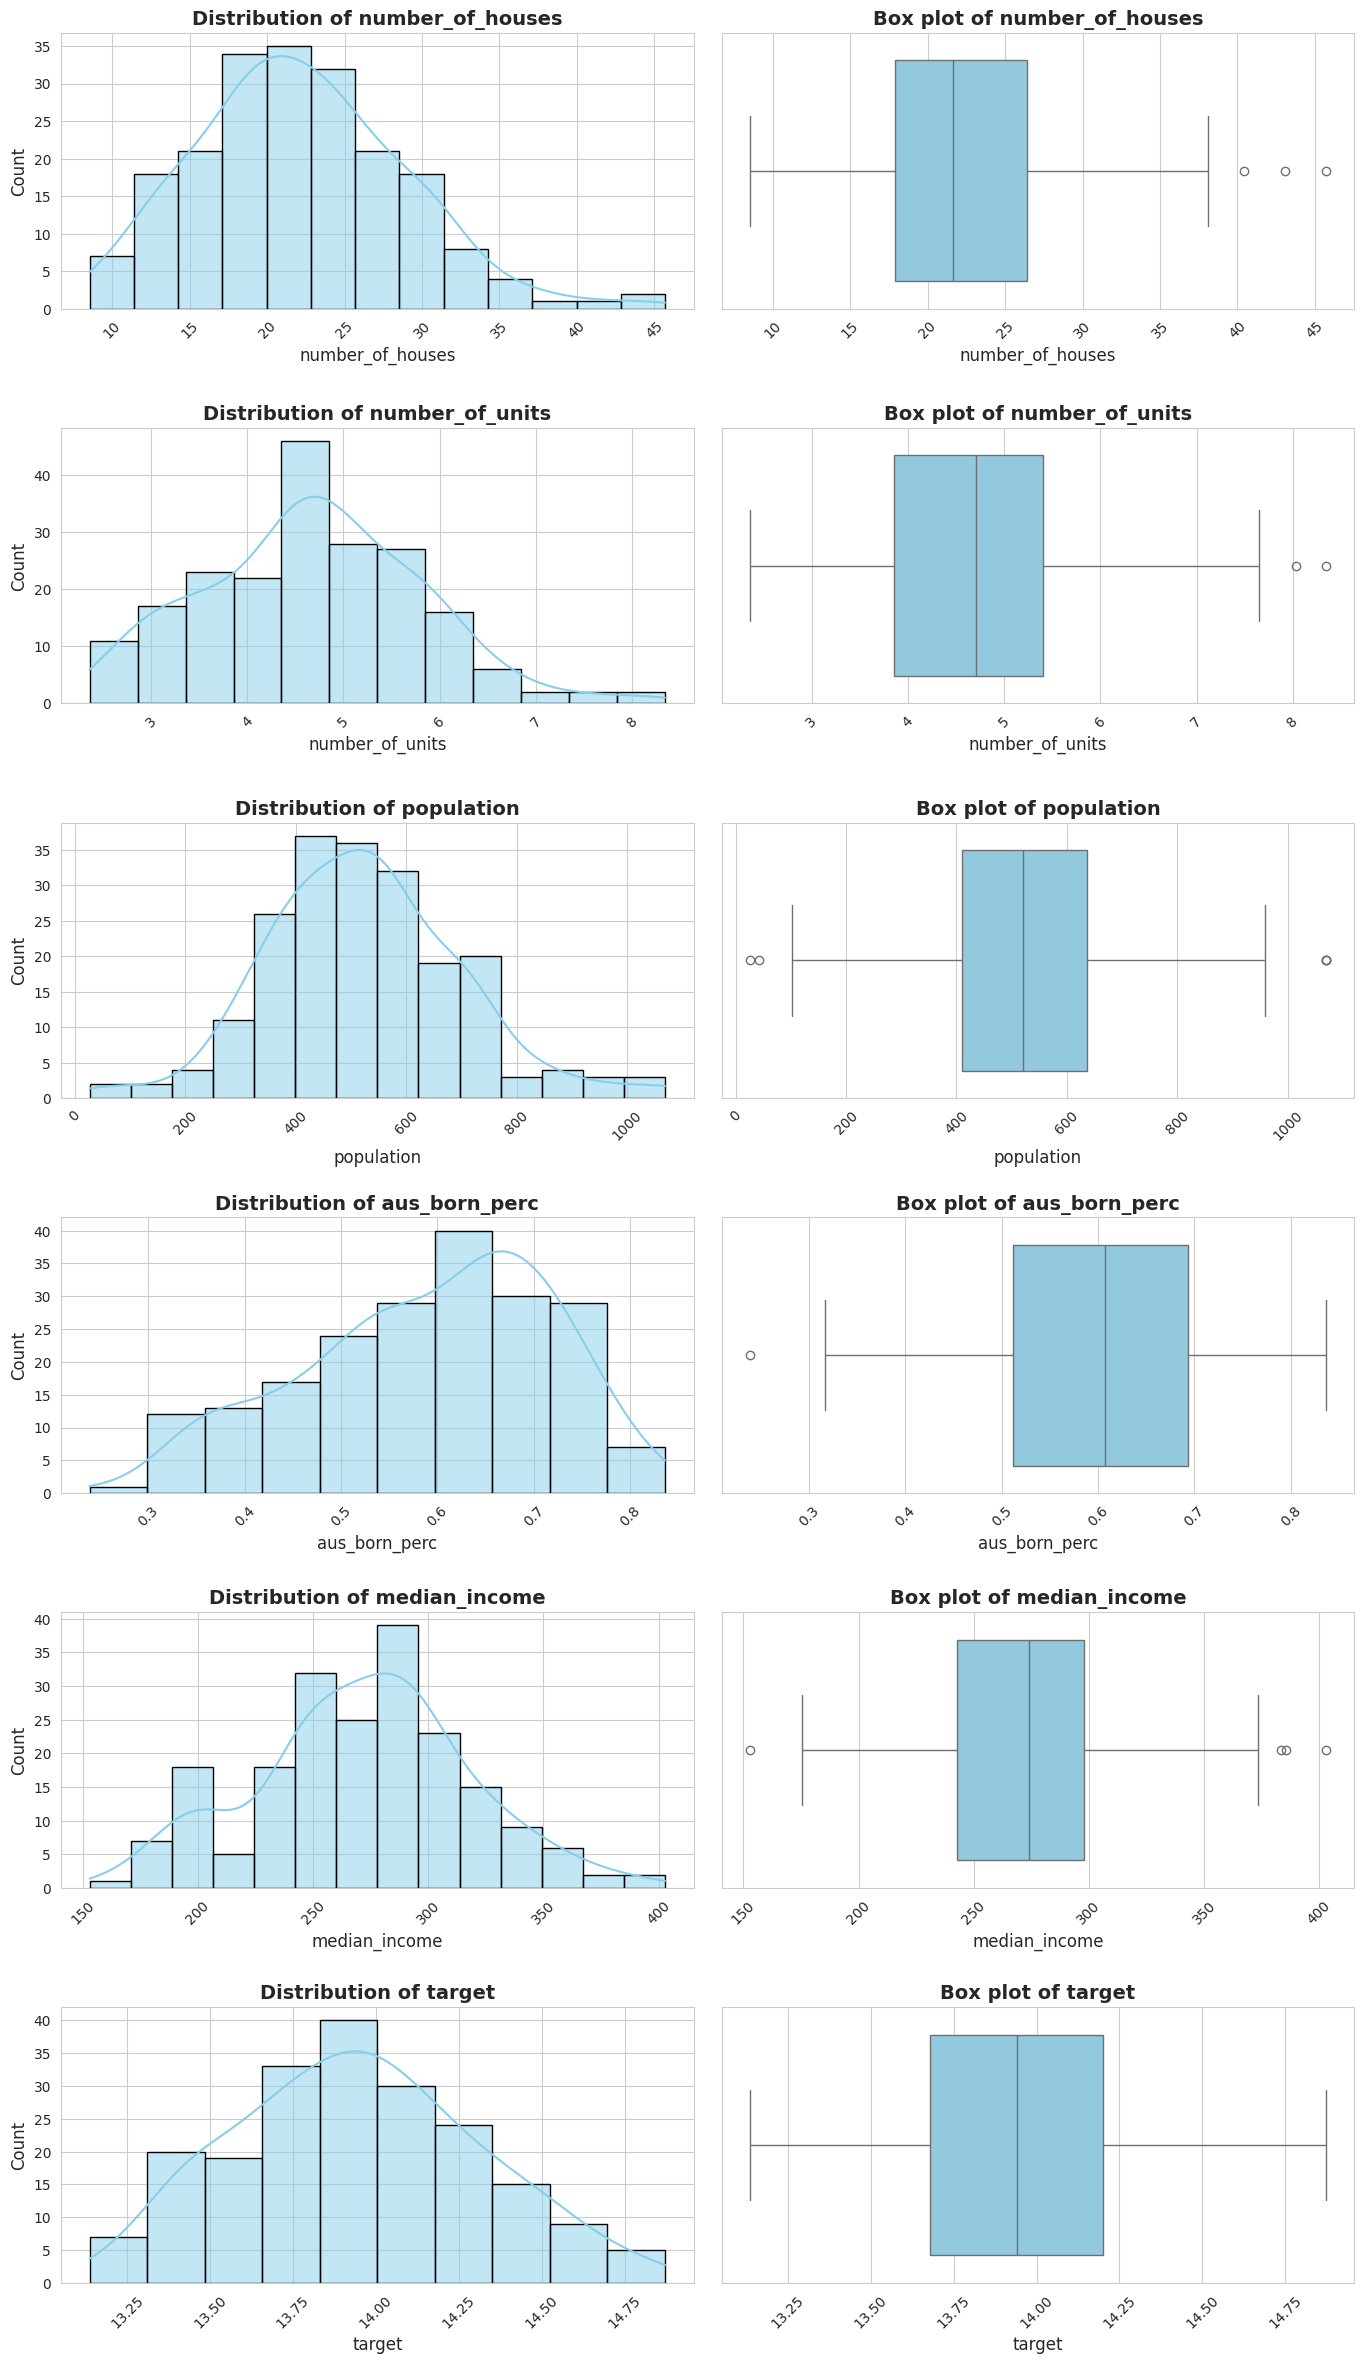

In [ ]:
def plot_hist_box(df):
    """
    Creates a series of histograms and box plots for each feature in the DataFrame.

    Parameters:
    df : DataFrame
        The DataFrame containing the features to be visualized.

    Returns:
    None : Displays the histograms and box plots.
    """

    # Determine the number of features (columns) in the DataFrame
    num_features = df.shape[1]

    # Create subplots: 2 columns (histograms and box plots), multiple rows depending on the number of features
    fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(14, 4 * num_features))

    # Flatten the axes for easier iteration over columns
    axes = axes.flatten()

    # Loop through each column of the DataFrame
    for i, column in enumerate(df.columns):
        # Plot histogram on the left side (even indices in the flattened axes array)
        sns.histplot(df[column], kde=True, ax=axes[2*i], color='skyblue', edgecolor='black')
        axes[2*i].set_title(f'Distribution of {column}', fontsize=14, weight='bold')
        axes[2*i].set_xlabel(column, fontsize=12)
        axes[2*i].set_ylabel('Count', fontsize=12)

        # Plot box plot on the right side (odd indices in the flattened axes array)
        sns.boxplot(x=df[column], ax=axes[2*i + 1], color='skyblue')
        axes[2*i + 1].set_title(f'Box plot of {column}', fontsize=14, weight='bold')
        axes[2*i + 1].set_xlabel(column, fontsize=12)

        # Rotate x-axis tick labels slightly for better readability
        axes[2*i].tick_params(axis='x', rotation=45)
        axes[2*i + 1].tick_params(axis='x', rotation=45)

    # Adjust layout to prevent overlapping elements and ensure better spacing
    plt.tight_layout(pad=2.0)

    # Display the plots
    plt.show()

plot_hist_box(df_final)


Based on the plot, and after considering the outliers and distribution, the following scaling methods have been chosen for each feature, along with the reasons:

- **Number of Houses**: StandardScaler  
  - The distribution will be preserved, and outliers are not an issue.
  
- **Number of Units**: StandardScaler  
  - The distribution will be maintained, and outliers are not a concern.
  
- **Population**: RobustScaler  
  - There are significant outliers, making standardization unsuitable.

- **Aus Born Percentage**: No scaling needed  
  - The data is already in the range of 0 to 1.

- **Median Income**: RobustScaler  
  - Due to the presence of outliers, standardization is not appropriate.

- **Target**: StandardScaler  
  - The distribution should be kept intact, and there are no outliers.

In [ ]:
# import scalar
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Separate 'aus_born_perc' and the other columns
columns_to_standardize = ['number_of_houses', 'number_of_units', 'target']
columns_to_robust = ['population', 'median_income']

# Apply the scaler to all columns except 'aus_born_perc'
df_final[columns_to_standardize] = standard_scaler.fit_transform(df_final[columns_to_standardize])
df_final[columns_to_robust] = robust_scaler.fit_transform(df_final[columns_to_robust])

df_final.describe()

,number_of_houses,number_of_units,population,aus_born_perc,median_income,target
count,2.020000e+02,2.020000e+02,202.000000,202.000000,202.000000,2.020000e+02
mean,3.792346e-16,8.793846e-17,0.015463,0.591340,-0.039354,-4.287000e-15
std,1.002484e+00,1.002484e+00,0.778389,0.126832,0.841563,1.002484e+00
min,-2.025752e+00,-2.052355e+00,-2.175468,0.239234,-2.197079,-2.187068e+00
25%,-6.337354e-01,-7.289367e-01,-0.491379,0.512092,-0.566947,-7.236015e-01
50%,-7.448773e-02,2.402162e-02,0.000000,0.606928,0.000000,-6.786014e-03
75%,6.412731e-01,6.393532e-01,0.508621,0.693565,0.433053,6.903619e-01
max,3.518359e+00,3.236598e+00,2.409479,0.836134,2.342455,2.512350e+00


In [ ]:
df_test = df_final.copy()

-------------------------------------

<div class="alert alert-block alert-warning">

## 8. Create Linear Regression Model <a class="anchor" name="create_model"></a>

 </div>

Before building the final model, it is beneficial to create additional features from the existing ones and perform feature selection to ensure the model's performance is optimized after all the transformations have been applied.

First, let's see the correlation for the final_df.

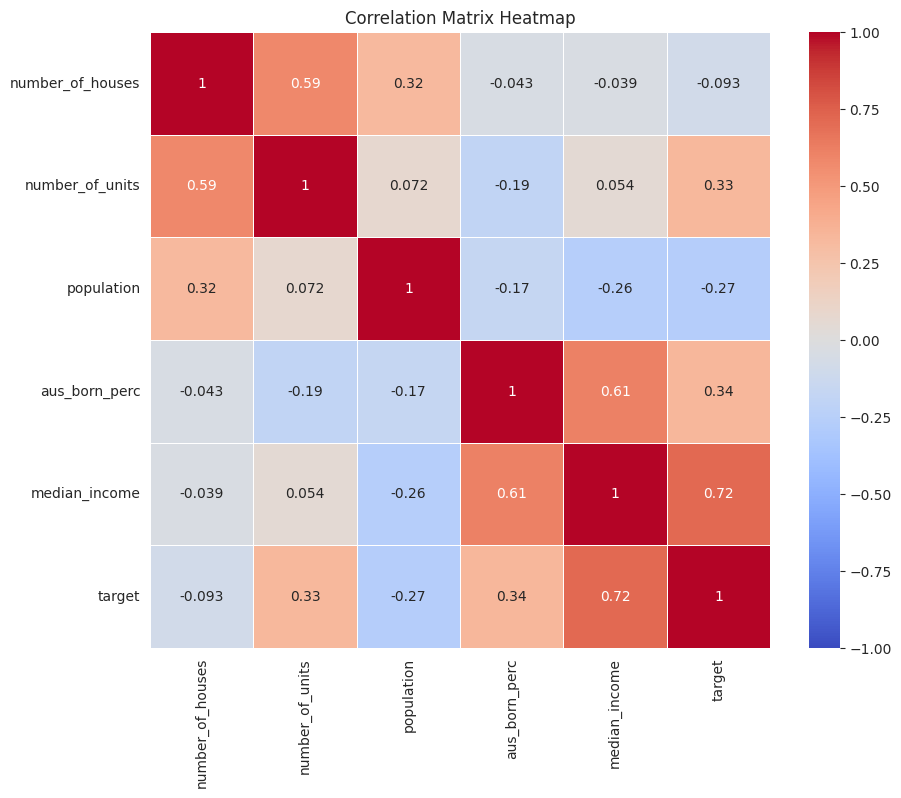

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df_final.corr()

# Display the correlation matrix
correlation_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

-------------------------------------

<div class="alert alert-block alert-warning">

### 8.1. Feature Engineering <a class="anchor" name="engineering"></a>

 </div>

The correlation table shows that certain features are highly correlated with each other, such as aus_born_perc with median_income, and number_of_houses with number_of_units.

With this, we are trying to use PCA (dimension reduction) for the highly correlated features.

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a large set of correlated variables into a smaller set of uncorrelated variables called principal components. These components capture the most variance in the data, with each successive component explaining less variance than the previous one. PCA helps simplify datasets while retaining the most important information, improving computational efficiency and reducing noise, making it useful for visualization and reducing the risk of overfitting in machine learning models (Abdi & Williams, 2010).

In [ ]:
df_final["pc_aus_born_perc_median_income"] = pca_feature(df_final, "aus_born_perc", "median_income")
df_final.head()

,number_of_houses,number_of_units,population,aus_born_perc,median_income,target,pc_aus_born_perc_median_income
0,-0.471990,1.081334,-1.400680,0.582791,1.027013,0.360787,1.060929
1,-0.953538,-0.947089,0.387595,0.744525,0.461131,1.427469,0.512582
2,-0.673406,-1.652893,2.409479,0.337179,-1.350378,-1.758313,-1.329004
3,-0.966885,-0.097645,0.981307,0.400318,-1.285626,-1.167311,-1.258651
4,-0.764379,-0.293484,-0.775393,0.643653,0.376740,1.135332,0.419158


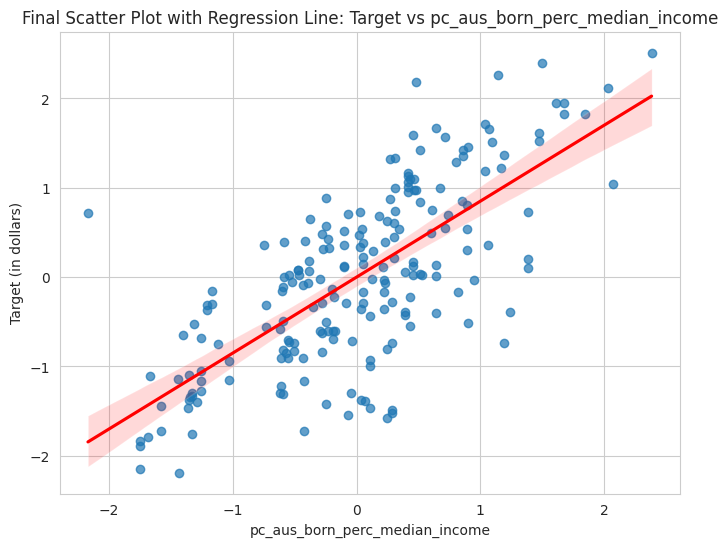

In [ ]:
scatter_plot(df_final, 'pc_aus_born_perc_median_income')

It could be seen that the new feature is linear towards the target.

-------------------------------------

<div class="alert alert-block alert-warning">

### 8.2. Feature Selection <a class="anchor" name="selection"></a>

 </div>

Let's check the correlation again.

In [ ]:
correlation_matrix = df_final.corr()
correlation_matrix

,number_of_houses,number_of_units,population,aus_born_perc,median_income,target,pc_aus_born_perc_median_income
number_of_houses,1.000000,0.585248,0.324176,-0.043440,-0.038880,-0.092978,-0.039153
number_of_units,0.585248,1.000000,0.072191,-0.189784,0.054192,0.329703,0.051071
population,0.324176,0.072191,1.000000,-0.168028,-0.262866,-0.270565,-0.262948
aus_born_perc,-0.043440,-0.189784,-0.168028,1.000000,0.612323,0.340833,0.621027
median_income,-0.038880,0.054192,-0.262866,0.612323,1.000000,0.717469,0.999939
target,-0.092978,0.329703,-0.270565,0.340833,0.717469,1.000000,0.716047
pc_aus_born_perc_median_income,-0.039153,0.051071,-0.262948,0.621027,0.999939,0.716047,1.000000


Next, in order to create a dataset that adheres to the model assumptions, we will evaluate the model's performance by analyzing the residual plot after potentially removing **aus_born_perc**, **median_income**, or a new combined feature, **pc_aus_born_perc_median_income**, which merges these two highly correlated variables. This approach will help us identify the best strategy for feature selection and ensure the model meets the necessary assumptions.

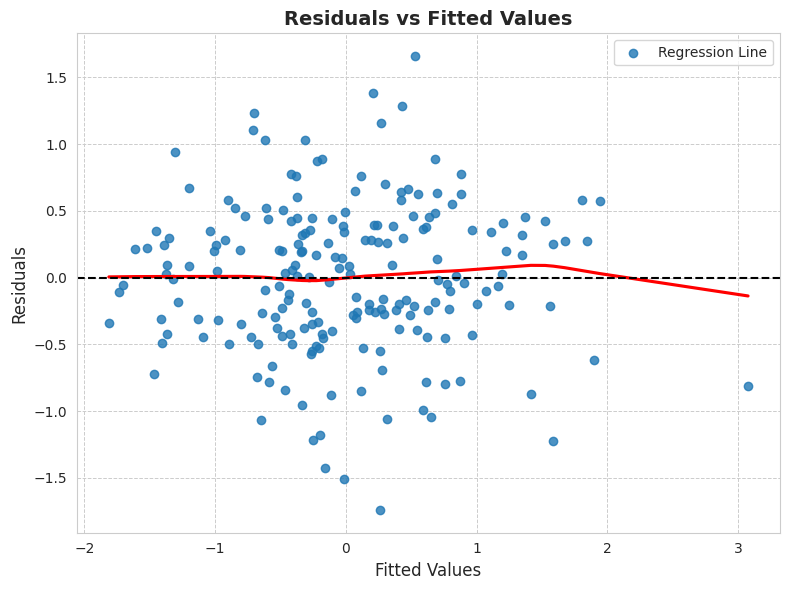

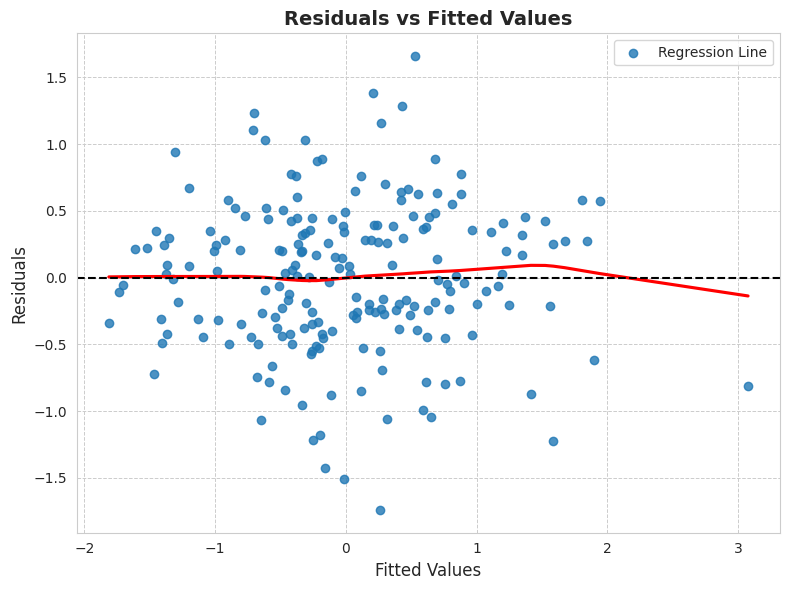

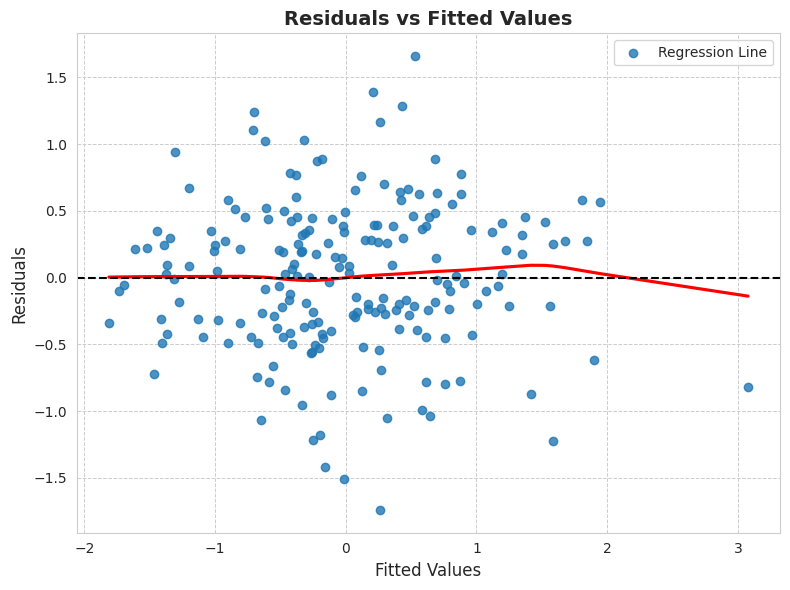

In [ ]:
# to check residual plot
df_check = df_final.copy()

plot_single_residual(df_check.drop(columns = "aus_born_perc"), "target", residual_vs_fitted=True)
plot_single_residual(df_check.drop(columns = "median_income"), "target", residual_vs_fitted=True)
plot_single_residual(df_check.drop(columns = ["median_income", "aus_born_perc"]), "target", residual_vs_fitted=True)

The first plot shows fairly scattered residuals, but there is a noticeable curvature, especially on the right side where the residuals curve upward before dipping. This suggests potential non-linearity in the model. In the second plot, the residuals display less curvature overall, though a slight "wave" pattern is still present. However, the residuals are more evenly distributed around the zero line compared to the first plot. The third plot follows a similar pattern to the second, with minimal curvature and a more uniform spread of residuals. The distribution around the zero line is the best among the three, with less variance in the residuals at both the lower and higher ends of the fitted values.

In conclusion, the third plot appears to be the most favorable, as it shows a more random distribution of residuals around the zero line and less evidence of curvature. This indicates a better model fit and suggests reduced non-linearity and heteroscedasticity compared to the other plots. Thus, we remove median_income and aus_born_perc.

To perform effective feature selection, it's important to consider the assumption of multicollinearity, which suggests that features should not exhibit high correlations with one another (Pal & Bharati, 2019). From the correlation heatmap, we observe that number_of_houses has a weak correlation with the target variable but shows a strong correlation with number_of_units. However, since we are working with a multi-feature model, the exact impact on the model is uncertain. To further investigate, we can evaluate multicollinearity using the Variance Inflation Factor (VIF).

VIF is a measure used to assess multicollinearity among features. It quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. A high VIF value (typically above 10) suggests that the feature is highly correlated with others, which could lead to unstable estimates in the model. Lower VIF values indicate less multicollinearity, making the feature more reliable for modeling (Gujarati, 2004).

In [ ]:
# get the features
X = df_final.drop(['target'], axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                          feature            VIF
0                number_of_houses       1.794713
1                 number_of_units       1.759537
2                      population       1.226334
3                   aus_born_perc     266.362528
4                   median_income  113438.284016
5  pc_aus_born_perc_median_income  114593.072370


It was found that number_of_houses and number_of_units do not contribute to multicollinearity. However, aus_born_perc, median_income, and pc_aus_born_perc_median_income do, since pc_aus_born_perc_median_income is a PCA feature derived from aus_born_perc and median_income. One approach to address this is to assess the evaluation metrics, such as R² and MSE, when these features are removed.

In [ ]:
print(f"This is the result if we remove pc_aus_born_perc_median_income")
no_pc = build_final_model(df_final.drop(columns="pc_aus_born_perc_median_income"), target_column="target", model = True)

print(f"This is the result if we remove median_income")
no_median = build_final_model(df_final.drop(columns="median_income"), target_column="target", model = False)

print(f"This is the result if we remove aus_born_perc")
no_born_perc = build_final_model(df_final.drop(columns="aus_born_perc"), target_column="target", model = False)

print(f"This is the result if we remove aus_born_perc and median_income")
no_median_born_perc = build_final_model(df_final.drop(columns=["median_income", "aus_born_perc"]), target_column="target", model = False)

This is the result if we remove pc_aus_born_perc_median_income
R² for the model: 0.30831010906896994
MSE for the model: 0.39100943663571053
This is the result if we remove median_income
R² for the model: 0.30831010906897005
MSE for the model: 0.3910094366357104
This is the result if we remove aus_born_perc
R² for the model: 0.3083101090689686
MSE for the model: 0.3910094366357113
This is the result if we remove aus_born_perc and median_income
R² for the model: 0.30878468203921894
MSE for the model: 0.3907411624970068


From the result we could see that, we could safely remove median_income and aus_born_perc.

In [ ]:
df_final.drop(columns = ["median_income", "aus_born_perc"], inplace = True)

-------------------------------------

<div class="alert alert-block alert-warning">

### 8.3. Check Assumption <a class="anchor" name="check_assump"></a>

 </div>

Before we Make the final model, it would be great if we check the assumption one by one using more statistical methods.

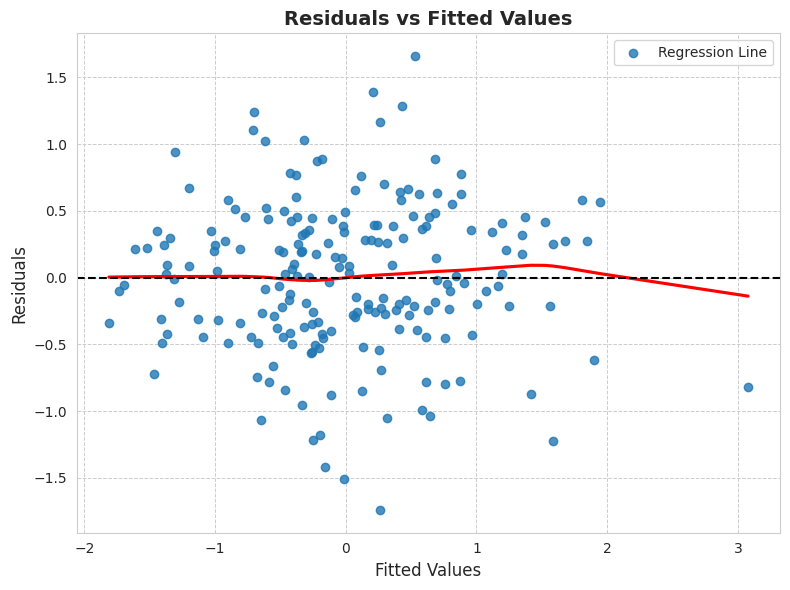

In [ ]:
plot_single_residual(df_final, "target", residual_vs_fitted=True)

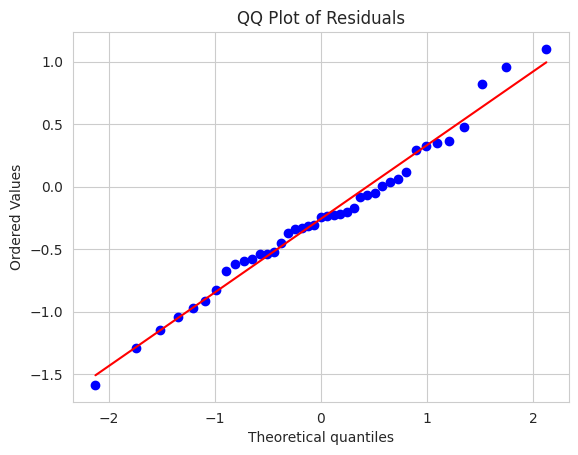

In [ ]:
qq_plot_residuals(df_final, "target")

In [ ]:
# get the features
X = df_final.drop(['target'], axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                          feature       VIF
0                number_of_houses  1.731383
1                 number_of_units  1.561929
2                      population  1.223646
3  pc_aus_born_perc_median_income  1.080053


In [ ]:
test_results = test_residuals_normality(df_final, target_column="target")
print(test_results)

{'Kolmogorov-Smirnov': {'statistic': 0.04960180199917141, 'p_value': 0.6839437654926881}, 'Shapiro-Wilk': {'statistic': 0.9943327428617323, 'p_value': 0.6429909542045211}}


1. **Linearity Assumption**:
   - **Test**: The residual plot is the main tool for checking linearity.
   - **Observation**: The residual plot shows a fairly even scatter around the zero line, with no obvious patterns or strong curvature. This indicates that the linearity assumption is reasonably well met, though there is some minor curvature that may suggest mild non-linearity.
   - **Conclusion**: The linearity assumption seems to be met with some small deviations, but it's overall acceptable.

2. **Independence of Errors**:
   - **Test**: The residuals in the plot should be randomly scattered, without patterns like waves or clusters.
   - **Observation**: There does not seem to be any clear trend or pattern in the residuals, which suggests that the errors are independent of each other.
   - **Conclusion**: The independence of errors assumption is likely satisfied.

3. **Homoscedasticity**:
   - **Test**: The residuals vs. fitted values plot checks for constant variance (homoscedasticity).
   - **Observation**: The variance of residuals appears fairly consistent across the range of fitted values, although there are some minor outliers. The variance is not clearly increasing or decreasing as the fitted values increase.
   - **Conclusion**: Homoscedasticity is reasonably satisfied, with no significant heteroscedasticity present.

4. **Normality of Residuals**:
   - **Test**: The Q-Q plot and the Shapiro-Wilk and Kolmogorov-Smirnov tests help check for the normality of residuals.
   - **Q-Q Plot**: The residuals follow the diagonal line closely, indicating that the residuals are approximately normally distributed.
   - **Shapiro-Wilk Test**: p-value = 0.643, which is greater than 0.05, indicating that we fail to reject the null hypothesis of normality (the residuals are approximately normally distributed).
   - **Kolmogorov-Smirnov Test**: p-value = 0.684, which also suggests that the residuals are normally distributed.
   - **Conclusion**: The normality assumption is well met.

5. **No Multicollinearity**:
   - **Test**: The VIF shows there are no multicollinearity in the model.
   - **Observation**: Every features have VIF around 1 which is low.
   - **Conclusion**: The multicollinearity assumption is satisfied since there are no highly correlated predictors (e.g., correlations close to 1.0).

Summary:
- **Linearity**: Mostly satisfied with minor curvature.
- **Independence of Errors**: Satisfied.
- **Homoscedasticity**: Satisfied.
- **Normality of Residuals**: Well satisfied.
- **No Multicollinearity**: Satisfied.

-------------------------------------

<div class="alert alert-block alert-warning">

### 8.4. Final Model <a class="anchor" name="final_model"></a>

 </div>

In [ ]:
final_model = build_final_model(df_final, target_column="target")

R² for the model: 0.30878468203921894
MSE for the model: 0.3907411624970068


Let's compare it to the original dataset after getting scaled.

In [ ]:
raw_dataset_model = build_final_model(df_xlsx_selected, target_column="target")

R² for the model: 0.004476947381378604
MSE for the model: 91565062004.1542


Given the difficulty in determining whether the model has improved, we decided to scale the features. We opted to use the robust scaler for the original dataset due to the presence of numerous outliers.

In [ ]:
robust_scaler = RobustScaler()

columns_to_robust = ['population', 'median_income', 'number_of_houses', 'number_of_units', 'target']

df_xlsx_selected[columns_to_robust] = robust_scaler.fit_transform(df_xlsx_selected[columns_to_robust])

df_xlsx_selected.describe()

<ipython-input-70-0c77b1a91414>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xlsx_selected[columns_to_robust] = robust_scaler.fit_transform(df_xlsx_selected[columns_to_robust])


,number_of_houses,number_of_units,population,aus_born_perc,median_income,target
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.253672,0.355443,0.089827,0.683663,-0.013407,0.141264
std,0.959341,1.269064,0.801551,0.107613,0.841407,0.790250
min,-0.838787,-0.625076,-1.453263,0.360000,-2.011913,-1.050974
25%,-0.361918,-0.398015,-0.460691,0.620000,-0.557909,-0.442010
50%,0.000000,0.000000,0.000000,0.700000,0.000000,0.000000
75%,0.638082,0.601985,0.539309,0.770000,0.442091,0.557990
max,5.664739,9.227061,3.039726,0.880000,2.538716,2.917361


In [ ]:
raw_dataset_model = build_final_model(df_xlsx_selected, target_column="target")

R² for the model: 0.004476947381370278
MSE for the model: 0.2570176900091957


It could be seen that the model has been improved.

-------------------------------------

<div class="alert alert-block alert-warning">

## 9. Conclusion <a class="anchor" name="conclusion"></a>

 </div>

1. **Objective Overview**  
   The primary objective of this assignment was to build a linear regression model capable of accurately predicting house prices (`target`) using several features, such as `number_of_houses`, `number_of_units`, `population`, `aus_born_perc`, and `median_income`. The approach focused on ensuring that all key assumptions of linear regression were met, including linearity, normality of residuals, and the absence of multicollinearity.

2. **Data Transformation**  
   Various transformations were applied to the features and target variable to reduce skewness and improve linearity. For example:
   - **`target`**: A logarithmic transformation was applied to correct skewness and address homoscedasticity.
   - **`number_of_houses`**: A cube root transformation (power = 0.38) was applied.
   - **`number_of_units`**: A cube root transformation (power = 0.21) was used.
   - **`population`**: Transformed using a power of 0.64.
   - **`aus_born_perc`**: A power transformation with degree 1.4 was implemented.
   - **`median_income`**: Box-Cox transformation was applied.

3. **Data Scaling**  
   Different scaling techniques were employed based on feature characteristics:
   - **StandardScaler** was applied to `number_of_houses`, `number_of_units`, and the `target`.
   - **RobustScaler** was used for `population` and `median_income` to handle outliers effectively.

4. **Feature Engineering**  
   A new PCA feature was introduced to address potential collinearity between `aus_born_perc` and `median_income`.

5. **Feature Selection**  
   Feature selection was guided by residual plots, Variance Inflation Factor (VIF) values, and evaluation metrics like $R^2$ and Mean Squared Error (MSE). The residual plot indicated that the model performed better when only the new PCA feature was included. VIF analysis revealed multicollinearity between `aus_born_perc`, `median_income`, and the new PCA feature. Since there was no significant performance difference between retaining the PCA feature or keeping the original variables, `aus_born_perc` and `median_income` were removed due to their high correlation.

6. **Assumptions**  
   The linear regression model's assumptions were validated as follows:
   - **Linearity**: Achieved after applying the necessary transformations.
   - **Normality**: Confirmed through the Q-Q plot of the residuals.
   - **Homoscedasticity**: Addressed with the transformations, leading to evenly distributed residuals.
   - **Multicollinearity**: Managed using VIF analysis.
   - **Independence of Errors**: Verified through the dispersed pattern in the residual plot.

7. **Model Performance**  
   The model built on the transformed dataset outperformed the model using raw data. The adjusted R² improved, and Mean Squared Error (MSE) decreased, demonstrating a better overall fit.

8. **Future Improvements**  
   While the transformations improved the model's performance, further enhancements could be explored by experimenting with other algorithms, such as regularized regression models like Ridge and Lasso.

-------------------------------------

- <div class="alert alert-block alert-warning">

## 5. References <a class="anchor" name="references"></a>

 </div>

- Abdallah, Z. (2016). Data reshaping. Alexandria Repository. https://www.alexandriarepository.org

- Abdi, H., & Williams, L. J. (2010). Principal component analysis. WIREs Computational Statistics, 2(4), 433–459. https://doi.org/10.1002/wics.101&#8203;:contentReference[oaicite:0]{index=0}

- Box, G. E. P., & Cox, D. R. (1964). An analysis of transformations. Journal of the Royal Statistical Society: Series B (Methodological), 26(2), 211–252.

- Cao, X. H., Stojkovic, I., & Obradovic, Z. (2016). A robust data scaling algorithm to improve classification accuracies in biomedical data. BMC Bioinformatics, 17(1), 359. https://doi.org/10.1186/s12859-016-1236-x&#8203;:contentReference[oaicite:0]{index=0}

- Gujarati, D. N. (2004). Basic econometrics (4th ed.). McGraw-Hill.

- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning with applications in R. Springer.

- LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature, 521(7553), 436–444. https://doi.org/10.1038/nature14539

- Montgomery, D. C., Peck, E. A., & Vining, G. G. (2021). Introduction to linear regression analysis (6th ed.). Wiley.

- Pal, M., & Bharati, P. (2019). Introduction to correlation and linear regression analysis. In Applications of regression techniques (pp. 1–21). Springer. https://doi.org/10.1007/978-981-13-9314-3_1

- Scikit-learn. (n.d.). sklearn.linear_model.LinearRegression. Scikit-learn 1.5 documentation. https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html